## Score Paragraph level

In [8]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# def analyze_scores(folder_path: str):
#     """
#     Read and analyze scores from all JSON files in the folder.
    
#     Args:
#         folder_path: Path to folder containing JSON files
    
#     Returns:
#         dict: Sum of scores for each question
#         int: Total number of files processed
#     """
#     # Initialize score sums for Q1-Q15
#     direct_score_sums = {f"Q{i}": 0 for i in range(1, 16)}
#     score_sums = {f"Q{i}": 0 for i in range(1, 16)}
    
#     # Get list of JSON files
#     json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
#     total_files = len(json_files)
    
#     print(f"Found {total_files} files to process")
    
#     # Process each file
#     for filename in tqdm(json_files, desc="Processing files"):
#         try:
#             with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as f:
#                 data = json.load(f)
                
#                 # Sum scores for each question
#                 for q_num in range(1, 16):
#                     key = f"Q{q_num}"
#                     if key in data and 'direct_score' in data[key]:
#                         direct_score_sums[key] += data[key]['direct_score']
#                         score_sums[key] += data[key]['score']    
                        
#         except Exception as e:
#             print(f"Error processing {filename}: {e}")
    
#     return direct_score_sums, score_sums, total_files

def analyze_scores(folder_path: str):
    """
    Read and analyze scores from all JSON files in the folder.
    Tracks direct_score and score separately, and counts when both are 1.
    
    Args:
        folder_path: Path to folder containing JSON files
    
    Returns:
        dict: Sum of direct scores (excluding 0.5)
        dict: Sum of scores (excluding 0.5)
        dict: Count of 0.5 values for direct_score
        dict: Count of 0.5 values for score
        dict: Total counts for each type of score
        dict: Count of cases where both scores are 1
    """
    # Initialize dictionaries for Q1-Q15
    direct_score_sums = {f"Q{i}": 0 for i in range(1, 16)}
    score_sums = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Track 0.5 counts separately for each type
    direct_half_counts = {f"Q{i}": 0 for i in range(1, 16)}
    score_half_counts = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Track total counts for each type
    direct_total_counts = {f"Q{i}": 0 for i in range(1, 16)}
    score_total_counts = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Track when both scores are 1
    both_ones_counts = {f"Q{i}": 0 for i in range(1, 16)}
    both_zero_counts = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Get list of JSON files
    json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    total_files = len(json_files)
    
    print(f"Found {total_files} files to process")
    
    # Process each file
    for filename in tqdm(json_files, desc="Processing files"):
        try:
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # Process scores for each question
                for q_num in range(1, 16):
                    key = f"Q{q_num}"
                    if key in data:
                        # Process direct_score
                        if 'direct_score' in data[key]:
                            direct_score = data[key]['direct_score']
                            direct_total_counts[key] += 1
                            
                            if direct_score == 0.5:
                                direct_half_counts[key] += 1
                            else:
                                direct_score_sums[key] += direct_score
                        
                        # Process score separately
                        if 'score' in data[key]:
                            score = data[key]['score']
                            score_total_counts[key] += 1
                            
                            if score == 0.5:
                                score_half_counts[key] += 1
                            else:
                                score_sums[key] += score
                        
                        # Check if both scores are 1 (and not 0.5)
                        if ('direct_score' in data[key] and 'score' in data[key] and 
                            data[key]['direct_score'] == 1 and data[key]['score'] == 1):
                            both_ones_counts[key] += 1

                        # Check if both scores are 1 (and not 0.5)
                        if ('direct_score' in data[key] and 'score' in data[key] and 
                            data[key]['direct_score'] == 0 and data[key]['score'] == 0):
                            both_zero_counts[key] += 1
                        
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    
    # Print summary for direct_score
    # print("\nDirect Score:")
    # print("-" * 40)
    for key in direct_total_counts:
        if direct_total_counts[key] > 0:
            half_ratio = direct_half_counts[key] / direct_total_counts[key]
            facts = direct_total_counts[key] - direct_half_counts[key] - direct_score_sums[key]
            # print(f"{key}:")
            # print(f"  Total count: {direct_total_counts[key]}  Facts: {facts}")
            # print(f"  0.5 count: {direct_half_counts[key]} ({half_ratio:.2%})")
            # print(f"  Sum (excluding 0.5): {direct_score_sums[key]}")
    
    # Print summary for score
    # print("\nScore:")
    # print("-" * 40)
    for key in score_total_counts:
        if score_total_counts[key] > 0:
            half_ratio = score_half_counts[key] / score_total_counts[key]
            # print(f"{key}:")
            # print(f"  Total count: {score_total_counts[key]}")
            # print(f"  0.5 count: {score_half_counts[key]} ({half_ratio:.2%})")
            # print(f"  Sum (excluding 0.5): {score_sums[key]}")
    
    # Print summary of both scores being 1
    # print("\nBoth Scores = 1:")
    # print("-" * 40)
    # for key in both_ones_counts:
    #     if direct_total_counts[key] > 0 and score_total_counts[key] > 0:
            # print(f"{key}: {both_ones_counts[key]} cases")

    # Print summary of both scores being 0
    # print("\nBoth Scores = 0:")
    # print("-" * 40)
    # for key in both_zero_counts:
    #     if direct_total_counts[key] > 0 and score_total_counts[key] > 0:
            # print(f"{key}: {both_zero_counts[key]} cases")
    
    return (direct_score_sums, score_sums, total_files,
            direct_half_counts, score_half_counts, 
            direct_total_counts, score_total_counts)

def plot_scores(score_sums: dict, total_files: int, name: str):
    """
    Create a bar plot of the scores.
    
    Args:
        score_sums: Dictionary containing sum of scores for each question
        total_files: Total number of files processed
        name: Name for saving the plot
    """

    x_axes_names = {
        1: "Title and purpose.",
        2: "Condition studied.",
        3: "Design Details.",
        4: "Interventions.",
        5: "Study Arms.",
        6: "Eligibility Criteria.",
        7: "Primary Outcome measured.",
        8: "Primary Outcome Statistical Analysis.",
        9: "Primary Outcome Statistical Results.",
        10: "Secondary Outcomes Overview.",
        11: "Secondary Outcomes Statistical Approach",
        12: "Secondary Outcomes Key Results.",
        13: "Serious Adverse Events.",
        14: "Non-Serious Adverse Events. ",
        15: "Key Observations and Clinical Relevance."
    }
    
    # Prepare data for plotting
    questions = list(range(1, 16))
    scores = [score_sums[f"Q{i}"] for i in questions]
    
    # Create figure and axis with larger size
    plt.figure(figsize=(20, 10))
    
    # Create bar plot
    bars = plt.bar(questions, scores)
    
    # Customize plot
    plt.title('Scores by Question Category vs JSON DataBase', fontsize=16, pad=20)
    plt.xlabel('Question Categories', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    
    # Set x-axis ticks with rotated labels
    plt.xticks(questions, 
               [x_axes_names[i] for i in questions],
               rotation=45,
               ha='right',
               fontsize=12)
    
    # Set y-axis limit from 0 to total number of files
    plt.ylim(0, total_files)
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', 
                va='bottom',
                fontsize=10)
    
    # Add some padding at the bottom for the rotated labels
    plt.subplots_adjust(bottom=0.2)
    
    # Save plot
    plt.savefig(name, dpi=300, bbox_inches='tight')
    print(f"Plot saved as '{name}'")
    
    # Show plot
    plt.show()
    
    # Close the figure to free memory
    plt.close()

## Title

Found 100 files to process


Processing files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 993.05it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 43
  0.5 count: 54 (54.00%)
  Sum (excluding 0.5): 3
Q2:
  Total count: 100  Facts: 50
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 2
Q3:
  Total count: 100  Facts: 12
  0.5 count: 56 (56.00%)
  Sum (excluding 0.5): 32
Q4:
  Total count: 100  Facts: 38
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 9
Q5:
  Total count: 100  Facts: 15
  0.5 count: 60 (60.00%)
  Sum (excluding 0.5): 25
Q6:
  Total count: 100  Facts: 13
  0.5 count: 61 (61.00%)
  Sum (excluding 0.5): 26
Q7:
  Total count: 100  Facts: 24
  0.5 count: 60 (60.00%)
  Sum (excluding 0.5): 16
Q8:
  Total count: 100  Facts: 6
  0.5 count: 66 (66.00%)
  Sum (excluding 0.5): 28
Q9:
  Total count: 100  Facts: 7
  0.5 count: 66 (66.00%)
  Sum (excluding 0.5): 27
Q10:
  Total count: 100  Facts: 14
  0.5 count: 70 (70.00%)
  Sum (excluding 0.5): 16
Q11:
  Total count: 100  Facts: 3
  0.5 count: 72 (72.00%)
  Sum (excluding 0.5): 25
Q12:
  Total 

Plot saved as 'direct_score_Paragraph_distribution_Title.png'


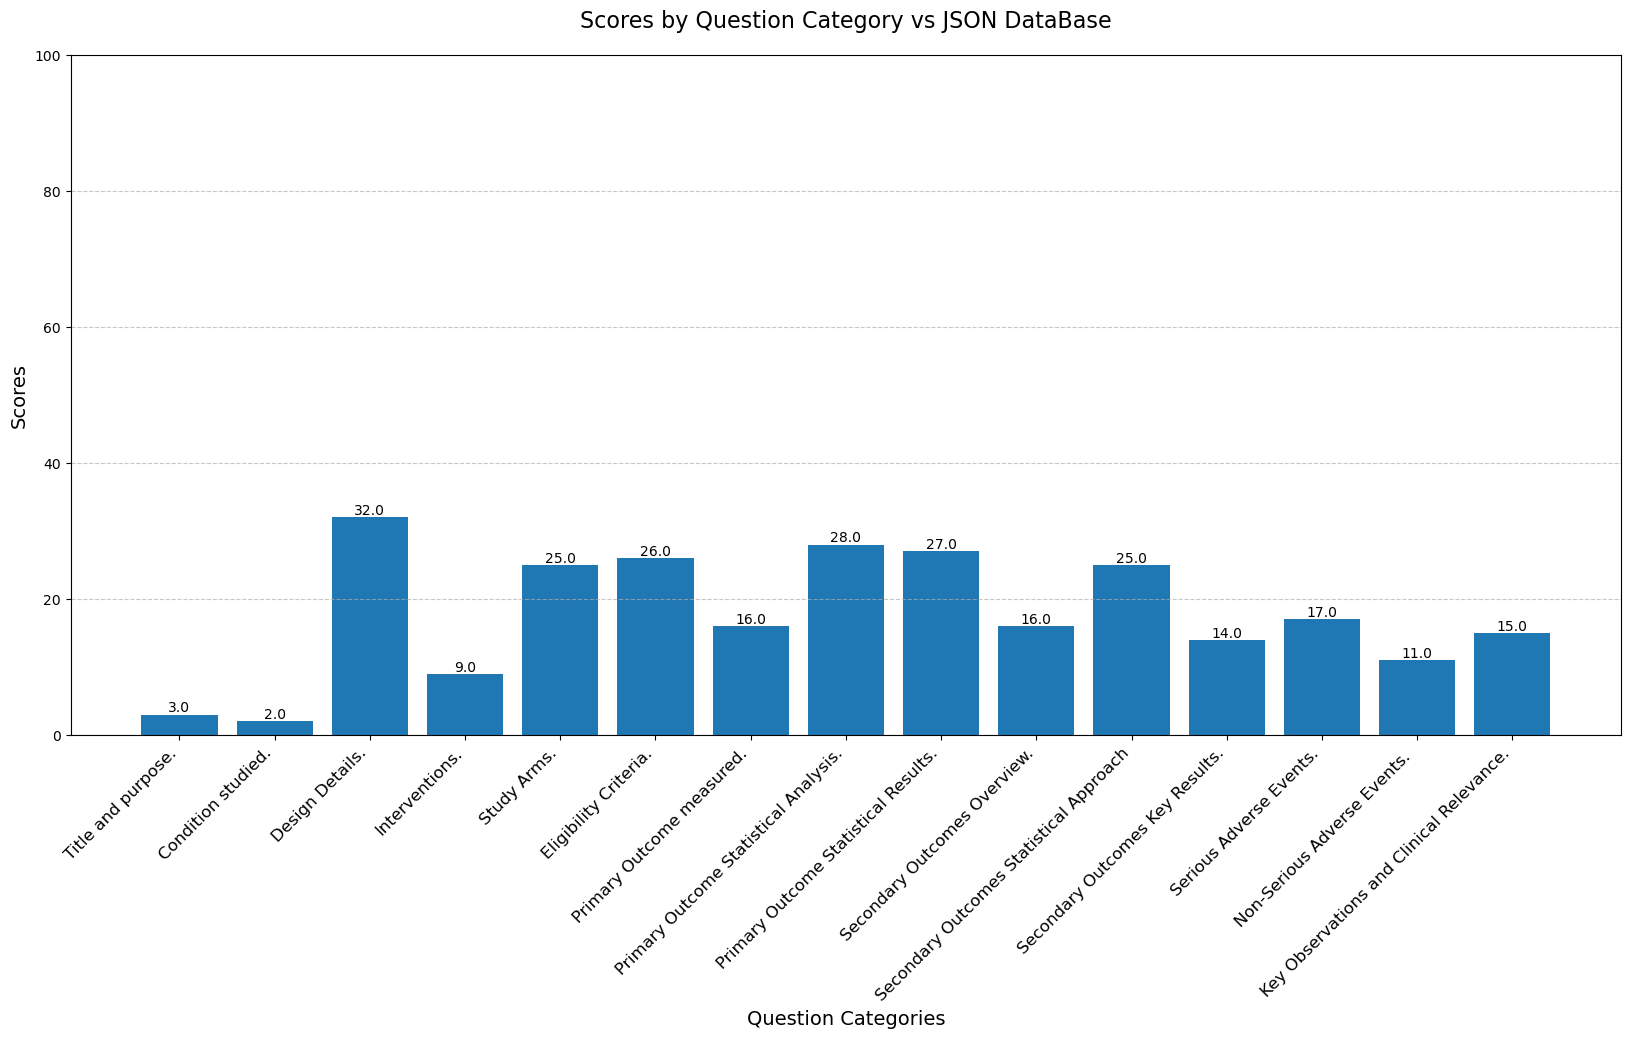

Plot saved as 'score_Paragraph_distribution_Title.png'


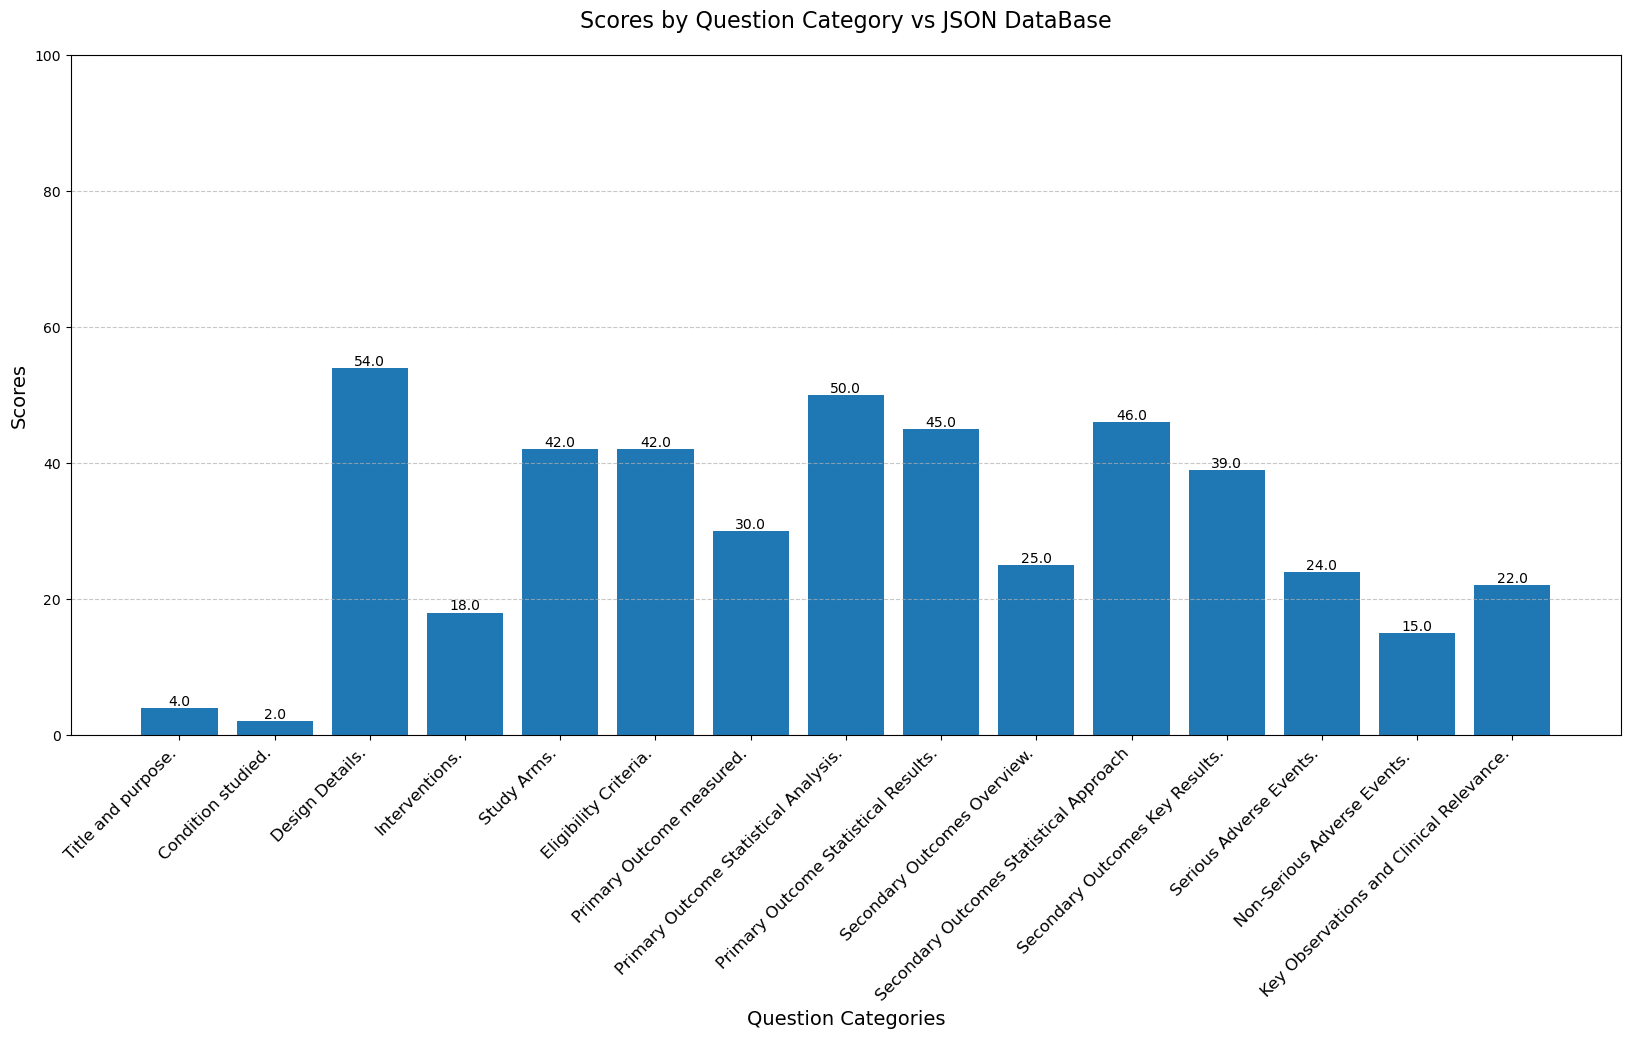

Plot saved as 'Error_direct_score_Paragraph_distribution_Title.png'


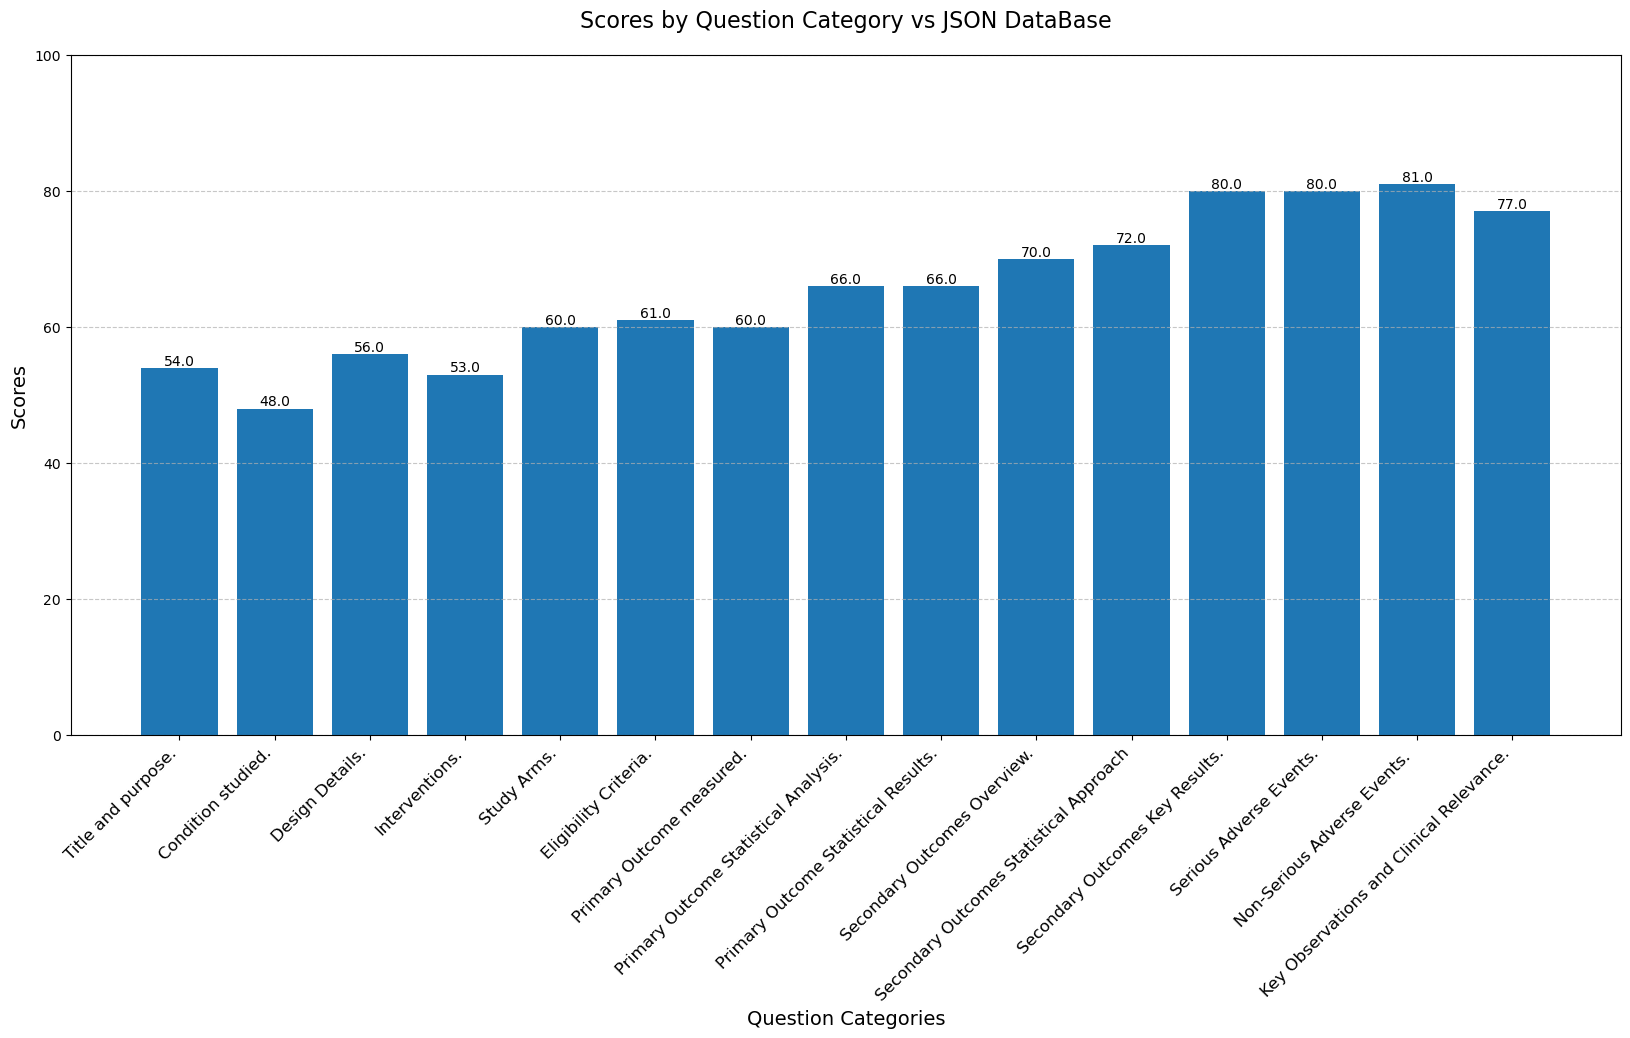

Plot saved as 'Error_score_Paragraph_distribution_Title.png'


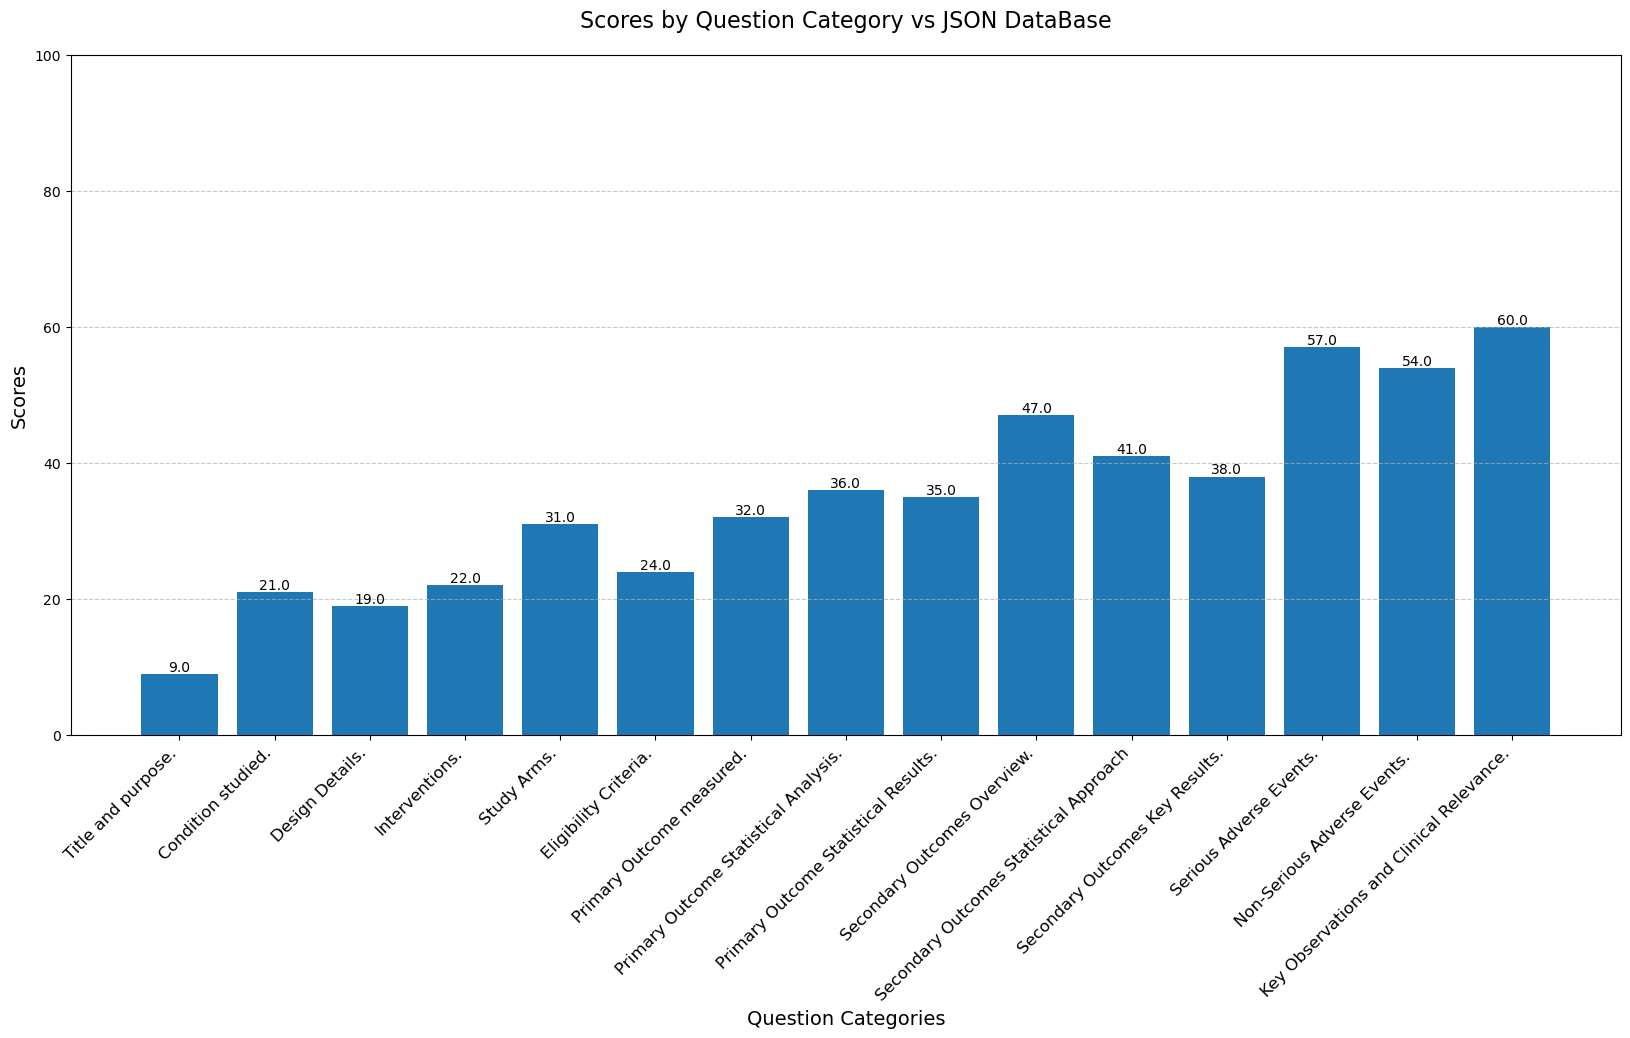

In [2]:
# Specify your folder path
folder_path = "Evaluation_title_Paragraph"  # Change this to your folder path
        
# Analyze scores
#direct_score_sums, score_sums, total_files = analyze_scores(folder_path)
# analize scores without 0.5
direct_score_sums, score_sums, total_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
        
# # Print results
# print("\nScore sums for each question:")
# for q, sum_score in score_sums.items():
#     print(f"{q}: {sum_score:.1f} ")
    
# for q, sum_score in direct_score_sums.items():
#     print(f"{q}: {sum_score:.1f} ")    
        
# Plot results
plot_scores(direct_score_sums, total_files, 'direct_score_Paragraph_distribution_Title.png')
plot_scores(score_sums, total_files, 'score_Paragraph_distribution_Title.png')

plot_scores(direct_half, total_files, 'Error_direct_score_Paragraph_distribution_Title.png')
plot_scores(score_half, total_files, 'Error_score_Paragraph_distribution_Title.png')

## JSON

Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1182.33it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 61
  0.5 count: 37 (37.00%)
  Sum (excluding 0.5): 2
Q2:
  Total count: 100  Facts: 68
  0.5 count: 30 (30.00%)
  Sum (excluding 0.5): 2
Q3:
  Total count: 100  Facts: 49
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 3
Q4:
  Total count: 100  Facts: 47
  0.5 count: 51 (51.00%)
  Sum (excluding 0.5): 2
Q5:
  Total count: 100  Facts: 47
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 5
Q6:
  Total count: 100  Facts: 36
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 11
Q7:
  Total count: 100  Facts: 46
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 1
Q8:
  Total count: 100  Facts: 37
  0.5 count: 58 (58.00%)
  Sum (excluding 0.5): 5
Q9:
  Total count: 100  Facts: 36
  0.5 count: 63 (63.00%)
  Sum (excluding 0.5): 1
Q10:
  Total count: 100  Facts: 33
  0.5 count: 64 (64.00%)
  Sum (excluding 0.5): 3
Q11:
  Total count: 100  Facts: 28
  0.5 count: 66 (66.00%)
  Sum (excluding 0.5): 6
Q12:
  Total coun

Plot saved as 'direct_score_Paragraph_distribution_JSON.png'


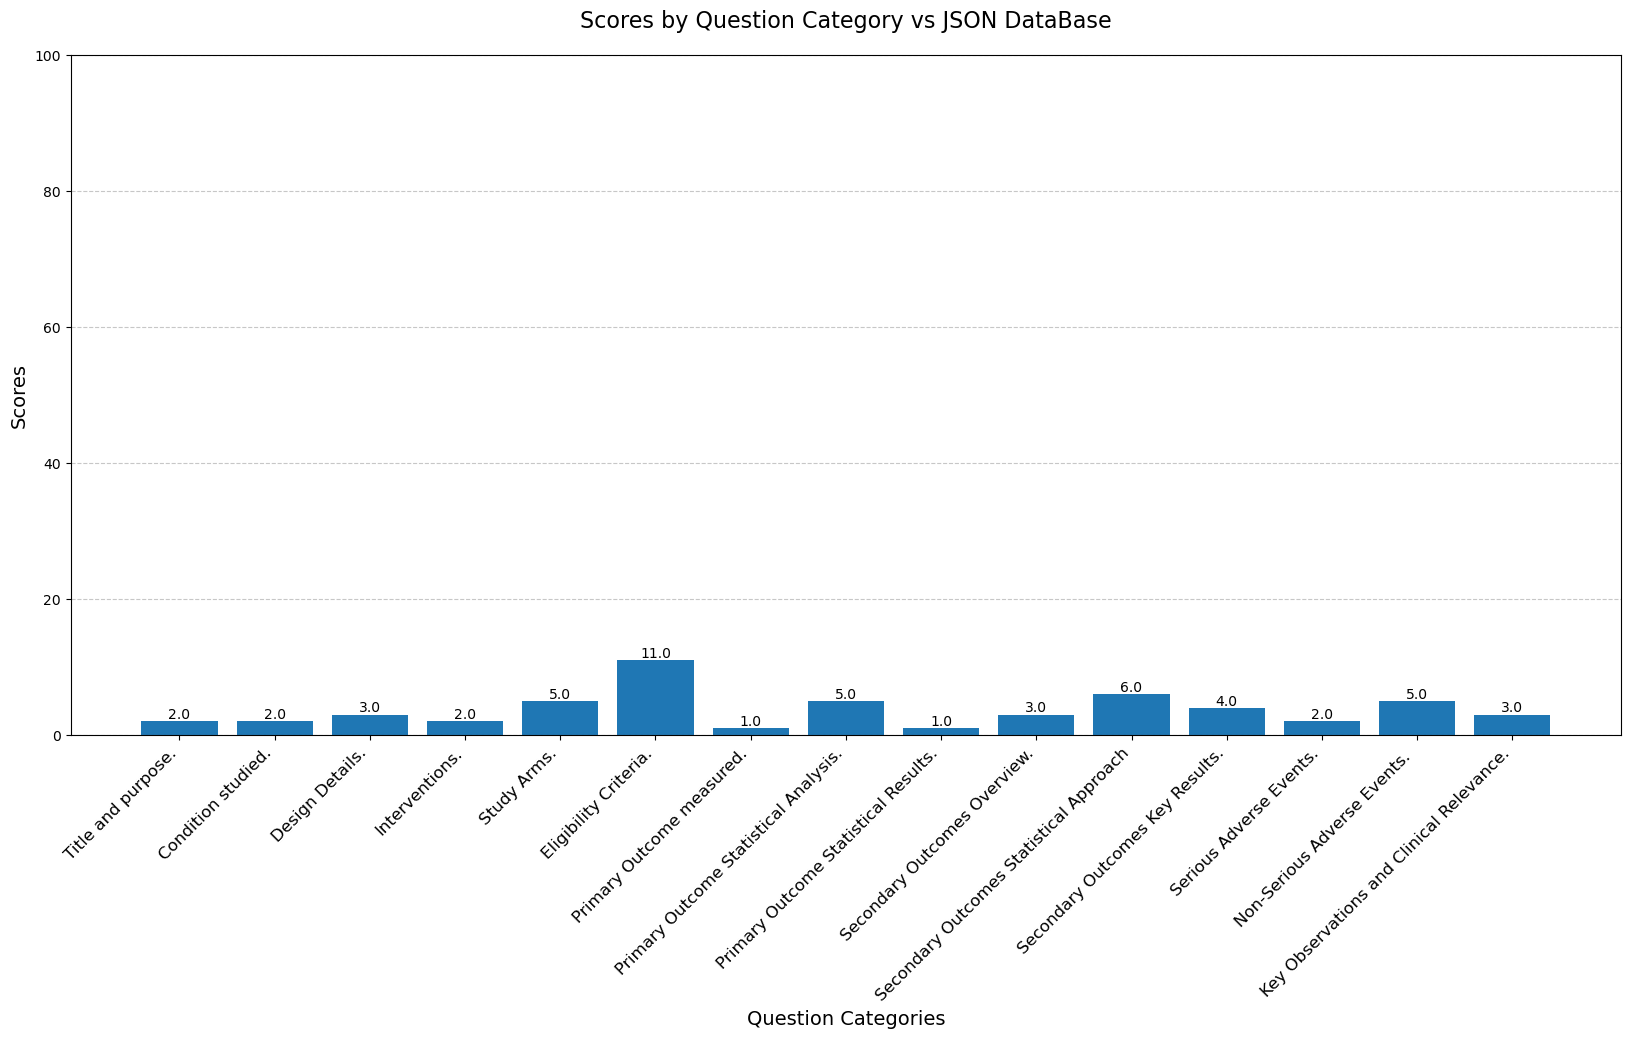

Plot saved as 'score_Paragraph_distribution_JSON.png'


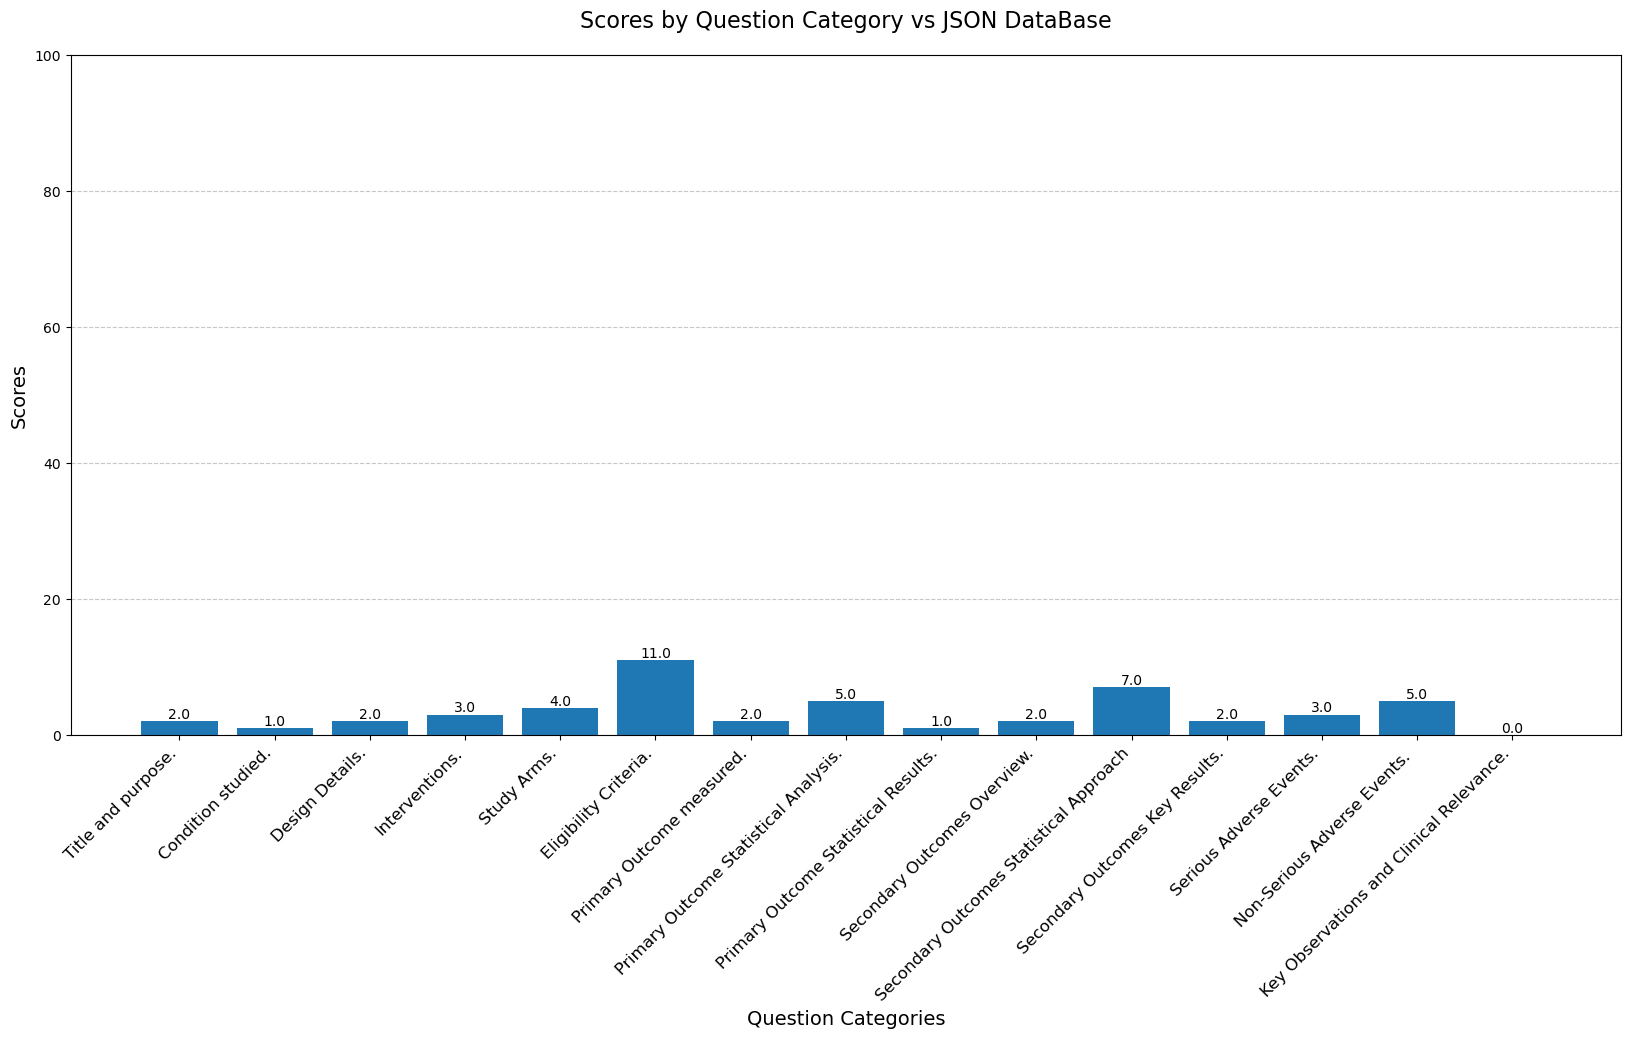

Plot saved as 'Error_direct_score_Paragraph_distribution_JSON.png'


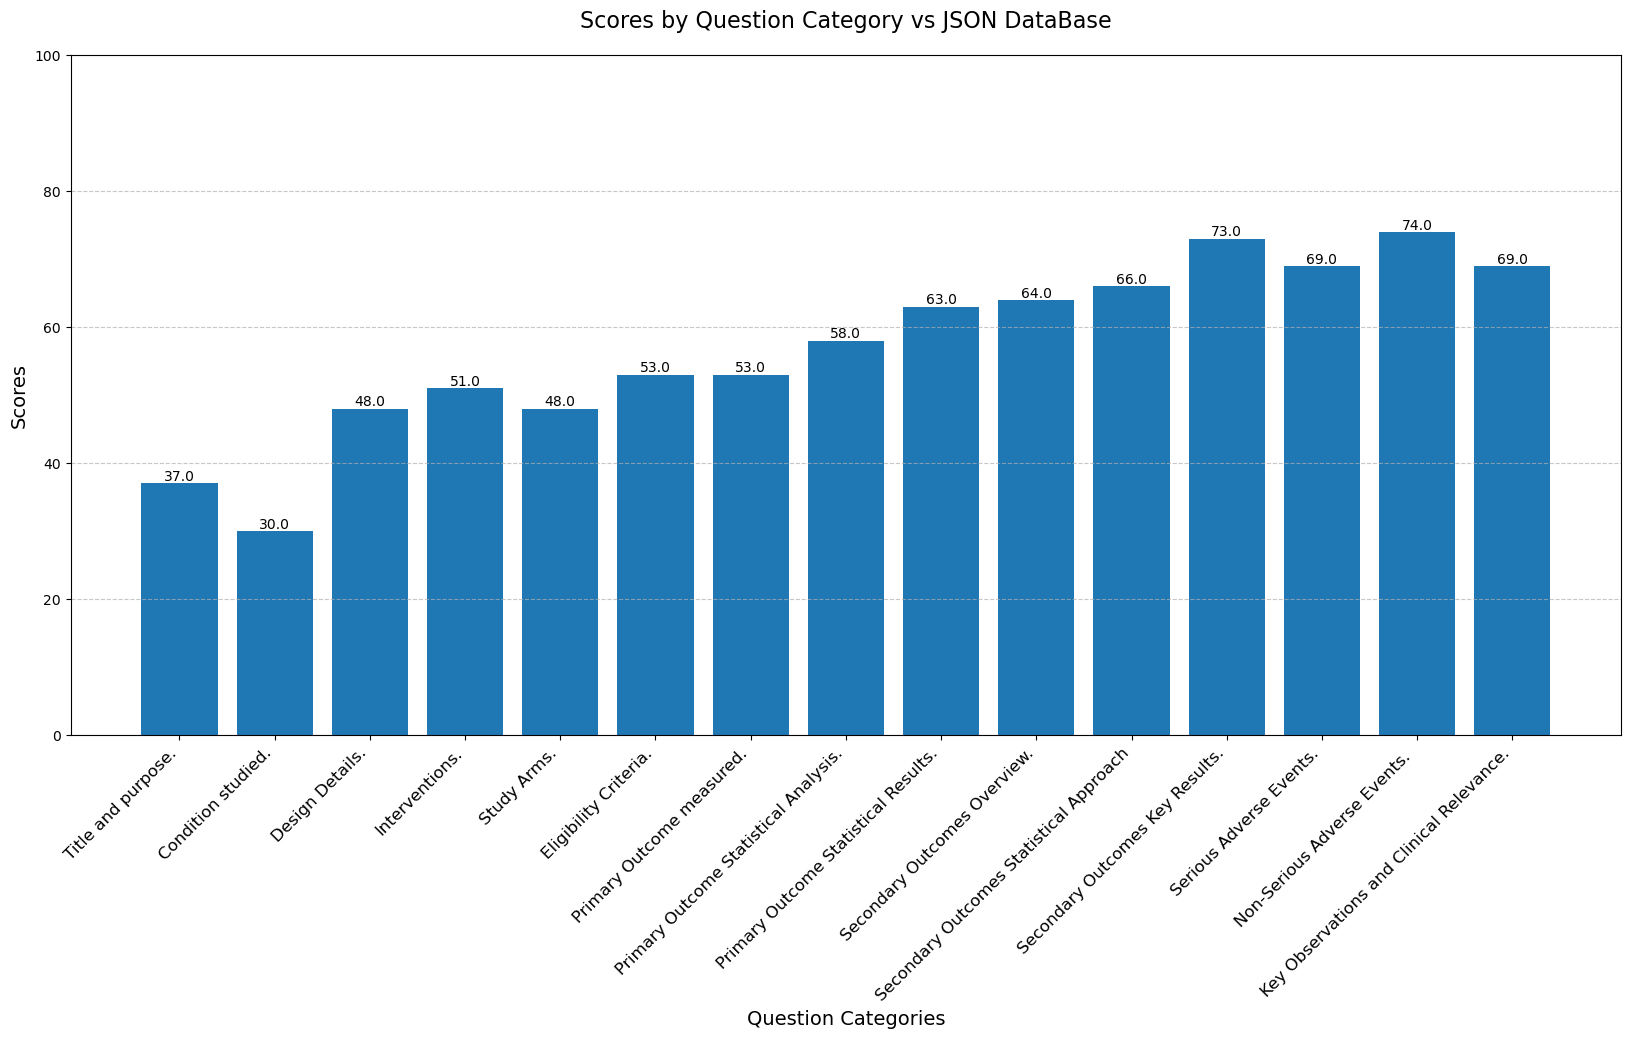

Plot saved as 'Error_score_Paragraph_distribution_JSON.png'


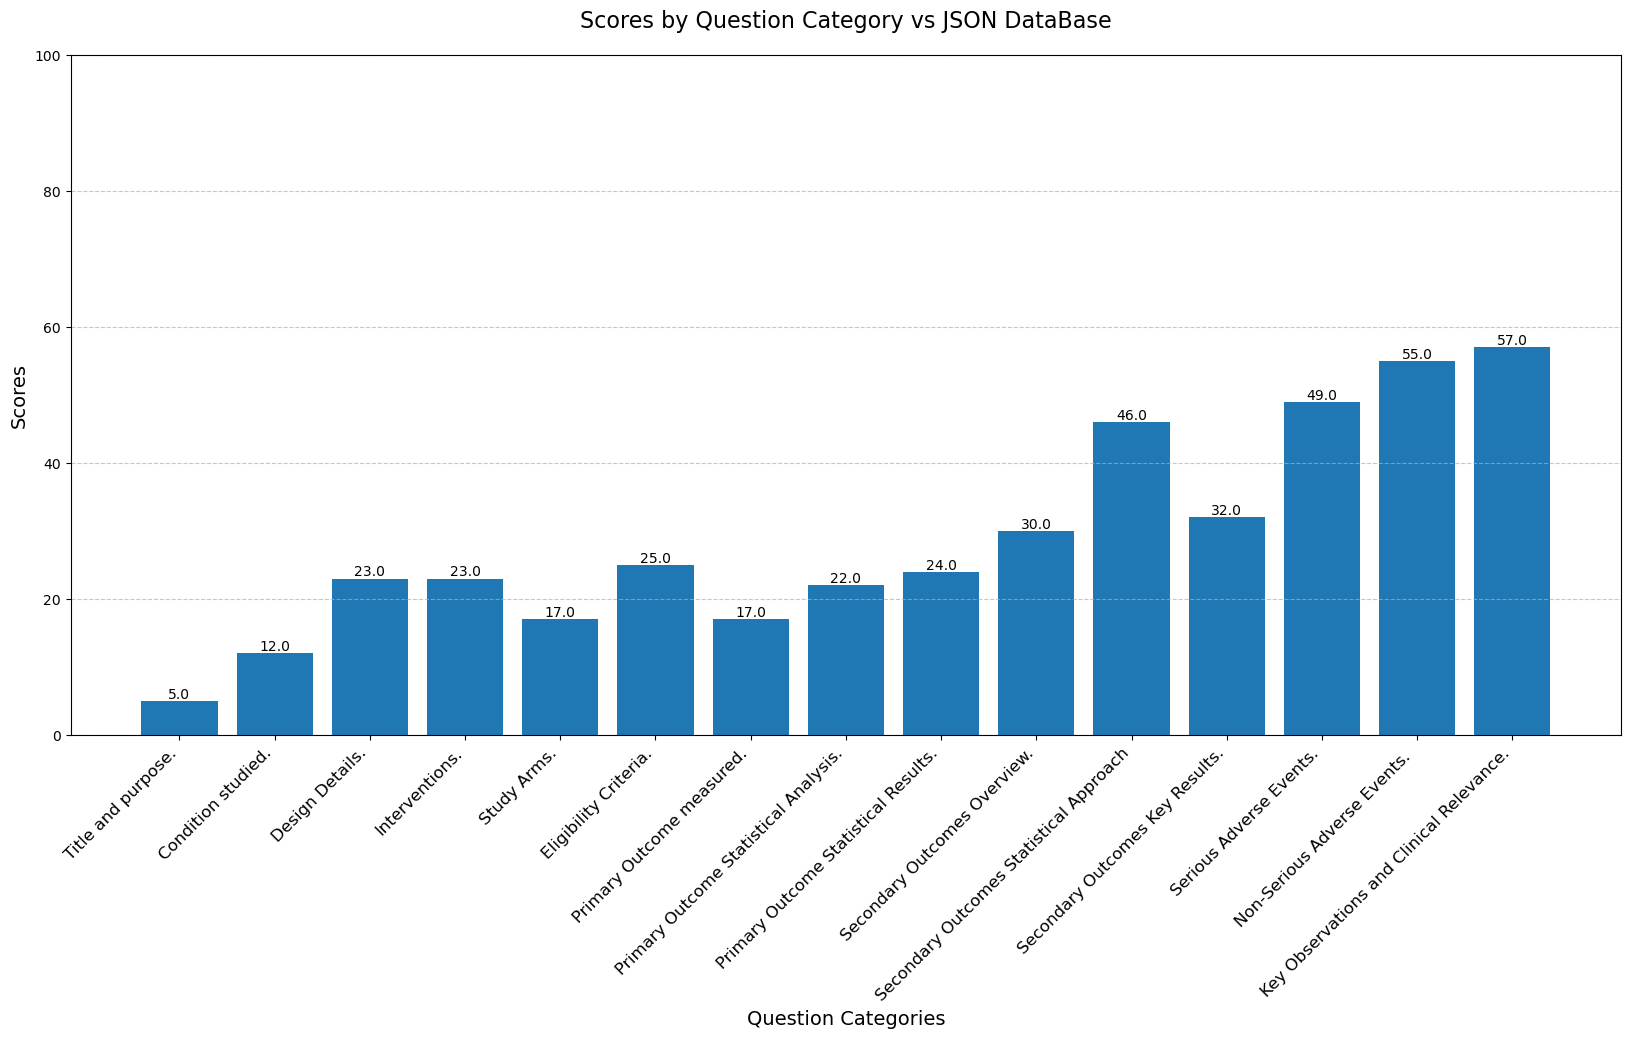

In [3]:
# Specify your folder path
folder_path = "Evaluation_json_Paragraph"  # Change this to your folder path
        
# Analyze scores
#direct_score_sums, score_sums, total_files = analyze_scores(folder_path)
# analize scores without 0.5
direct_score_sums, score_sums, total_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
        
# Plot results
plot_scores(direct_score_sums, total_files, 'direct_score_Paragraph_distribution_JSON.png')
plot_scores(score_sums, total_files, 'score_Paragraph_distribution_JSON.png')

plot_scores(direct_half, total_files, 'Error_direct_score_Paragraph_distribution_JSON.png')
plot_scores(score_half, total_files, 'Error_score_Paragraph_distribution_JSON.png')

## Summary

Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1391.43it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 57
  0.5 count: 42 (42.00%)
  Sum (excluding 0.5): 1
Q2:
  Total count: 100  Facts: 60
  0.5 count: 39 (39.00%)
  Sum (excluding 0.5): 1
Q3:
  Total count: 100  Facts: 47
  0.5 count: 52 (52.00%)
  Sum (excluding 0.5): 1
Q4:
  Total count: 100  Facts: 55
  0.5 count: 44 (44.00%)
  Sum (excluding 0.5): 1
Q5:
  Total count: 100  Facts: 50
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 2
Q6:
  Total count: 100  Facts: 46
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 1
Q7:
  Total count: 100  Facts: 39
  0.5 count: 58 (58.00%)
  Sum (excluding 0.5): 3
Q8:
  Total count: 100  Facts: 38
  0.5 count: 56 (56.00%)
  Sum (excluding 0.5): 6
Q9:
  Total count: 100  Facts: 33
  0.5 count: 59 (59.00%)
  Sum (excluding 0.5): 8
Q10:
  Total count: 100  Facts: 31
  0.5 count: 56 (56.00%)
  Sum (excluding 0.5): 13
Q11:
  Total count: 100  Facts: 27
  0.5 count: 58 (58.00%)
  Sum (excluding 0.5): 15
Q12:
  Total cou

Plot saved as 'direct_score_Paragraph_distribution_Summary.png'


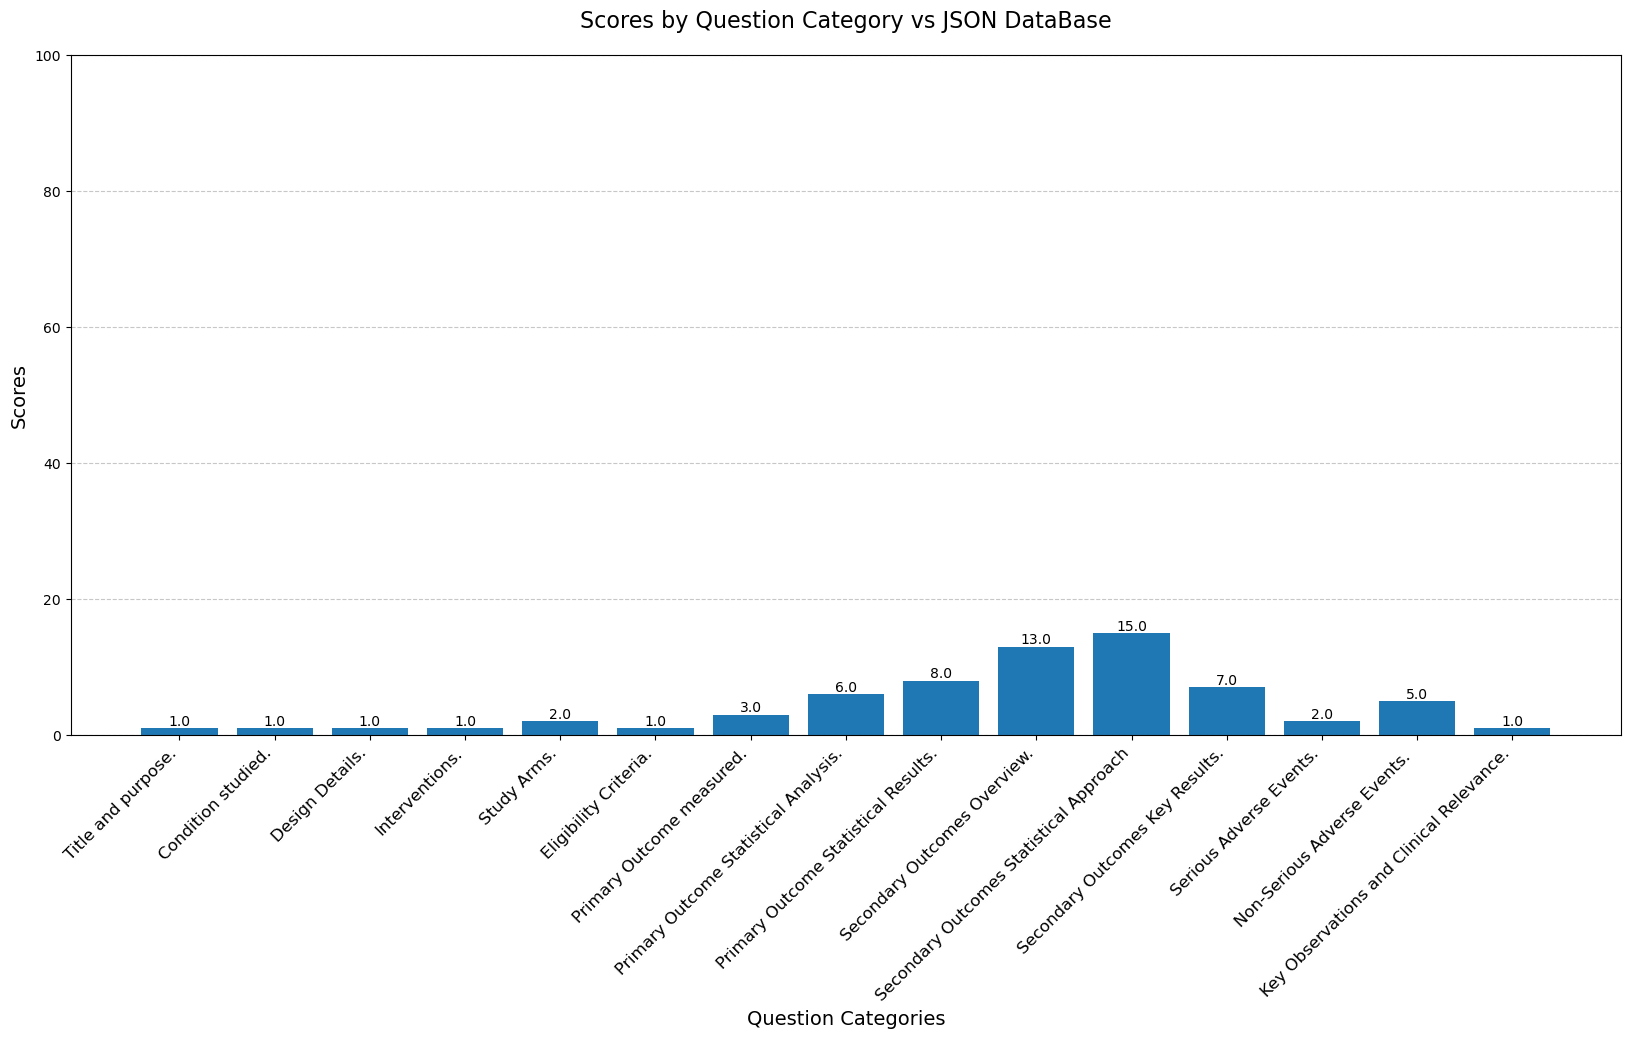

Plot saved as 'score_Paragraph_distribution_Summary.png'


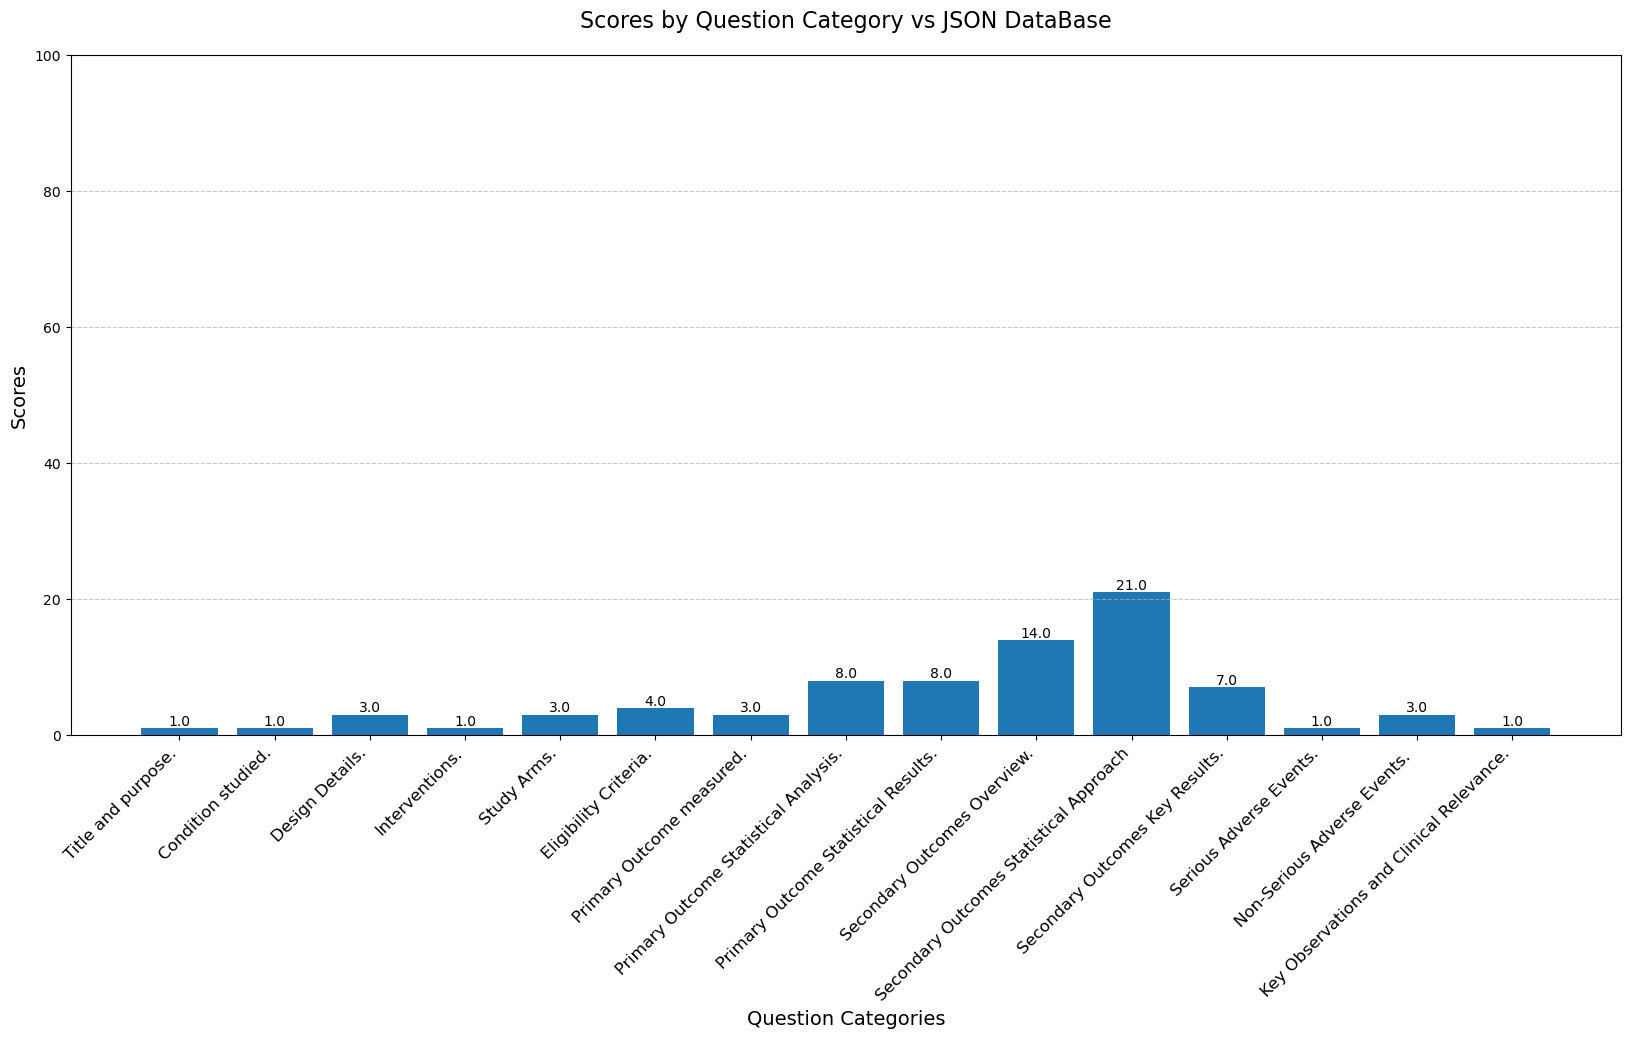

Plot saved as 'Error_direct_score_Paragraph_distribution_Summary.png'


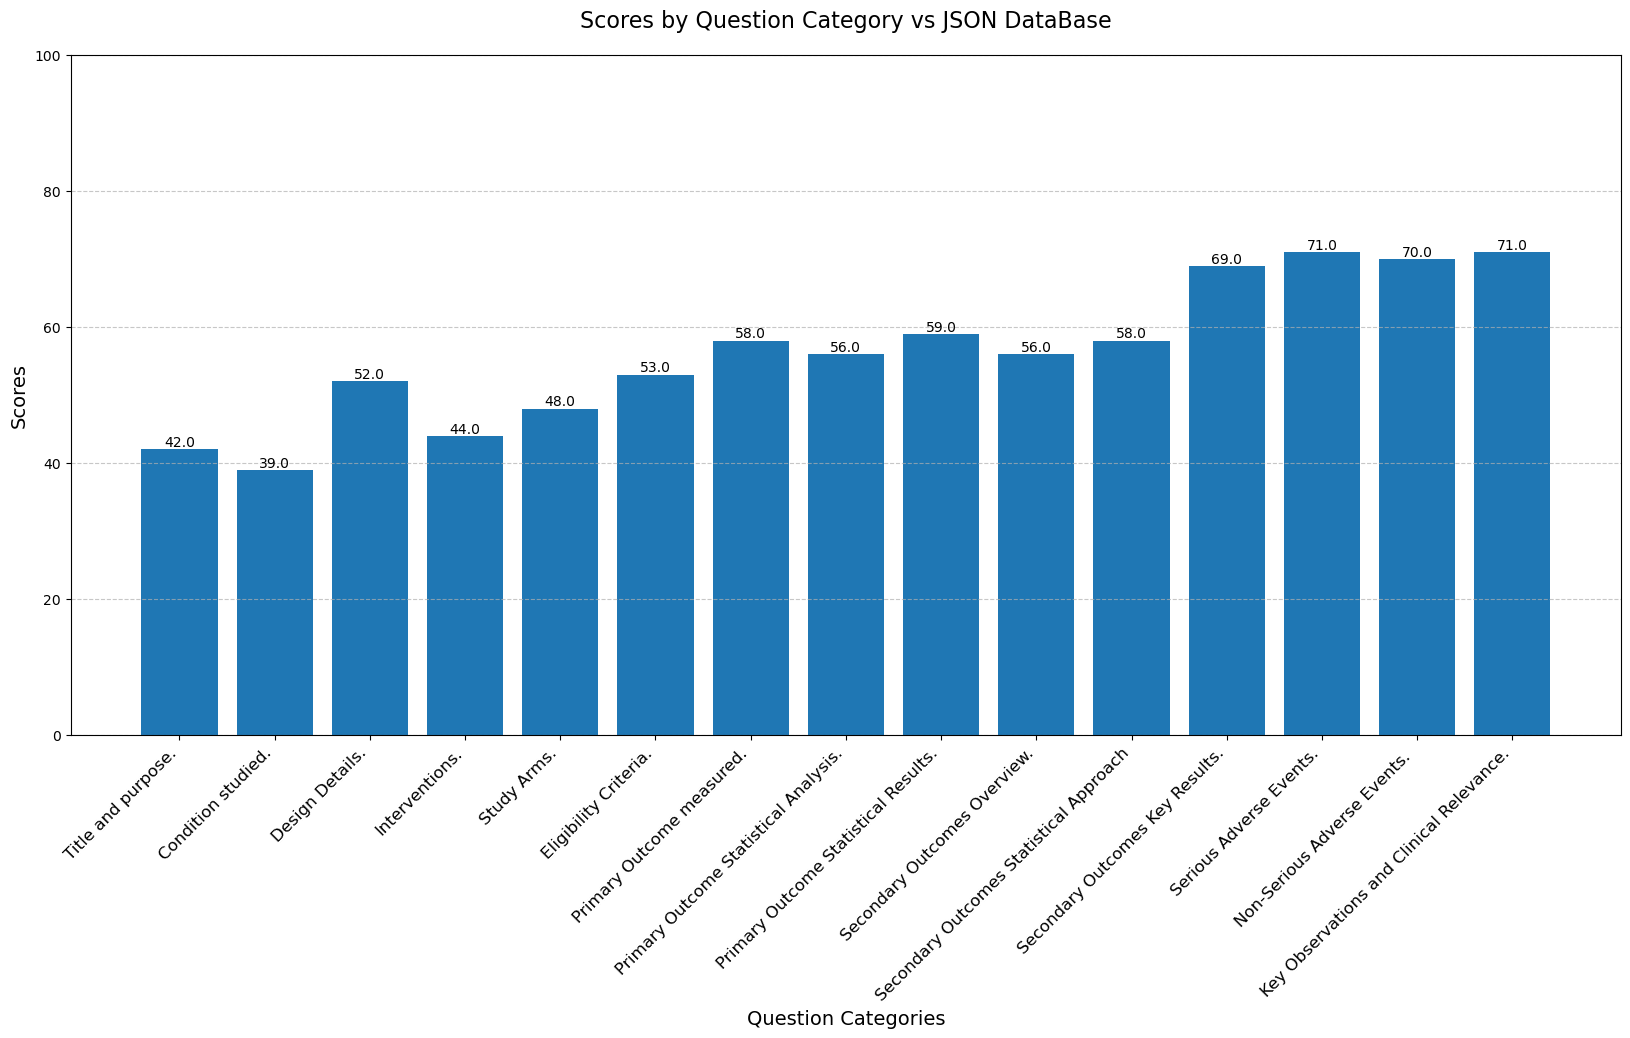

Plot saved as 'Error_score_Paragraph_distribution_Summary.png'


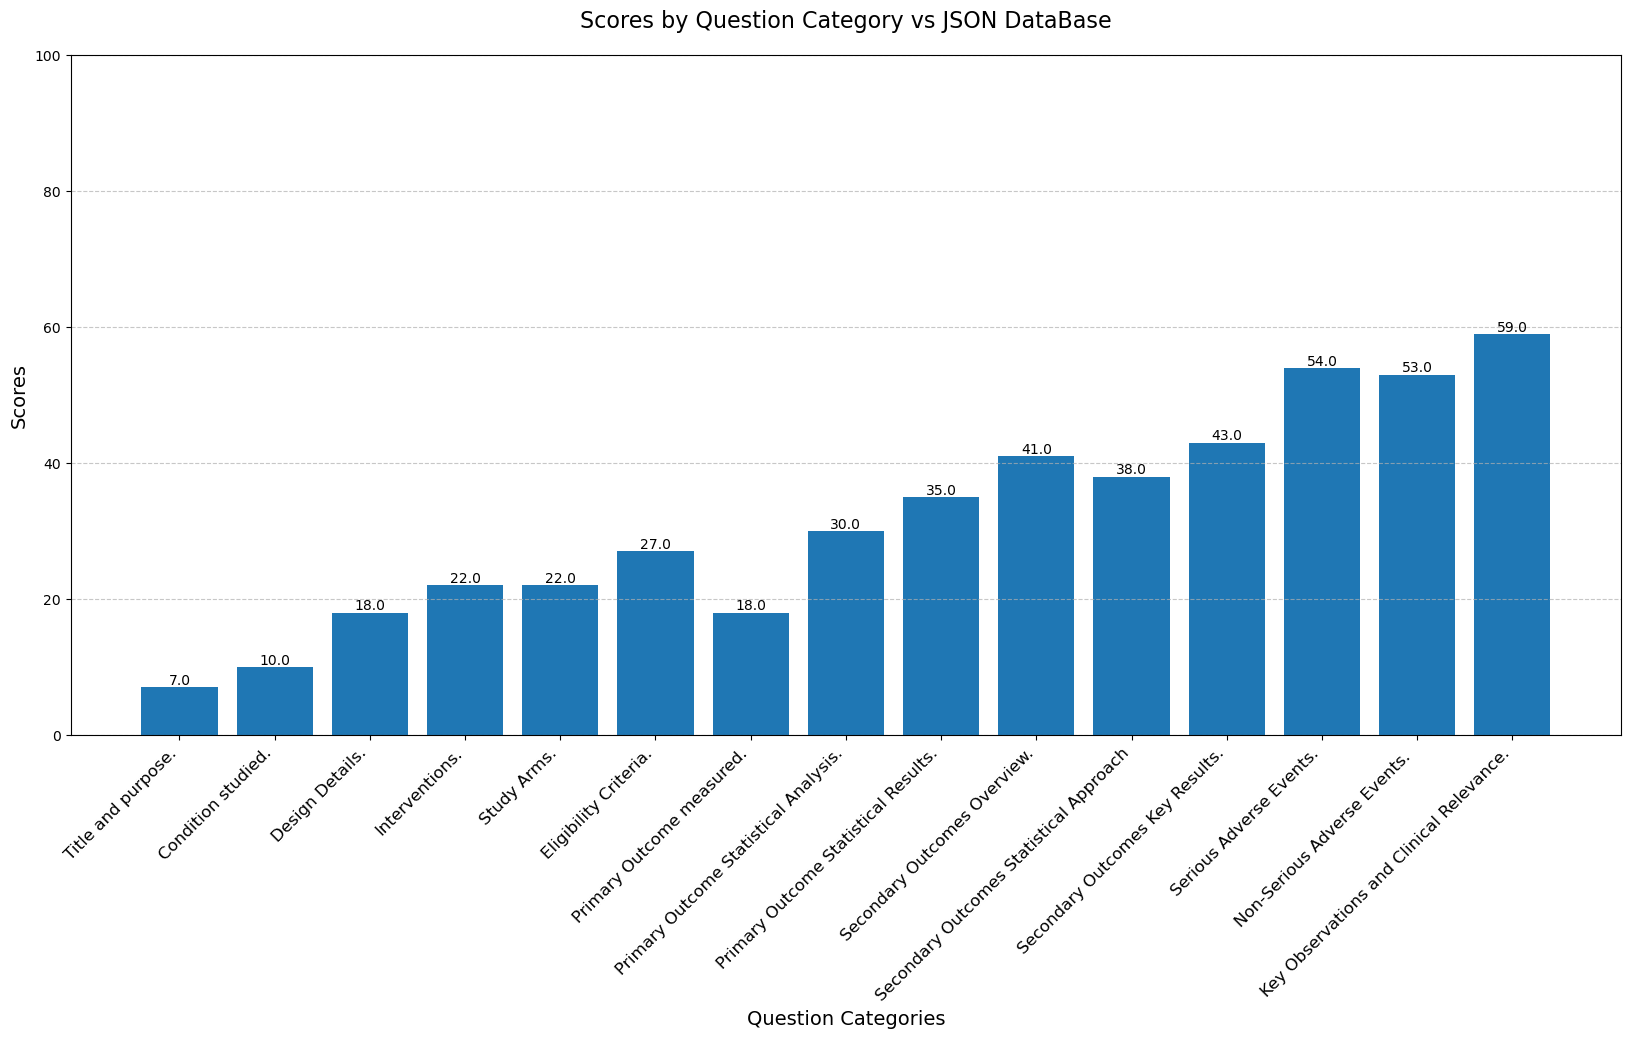

In [4]:
# Specify your folder path
folder_path = "Evaluation_summary_Paragraph"  # Change this to your folder path
        
# Analyze scores
#direct_score_sums, score_sums, total_files = analyze_scores(folder_path)
# analize scores without 0.5
direct_score_sums, score_sums, total_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
        
# Plot results
plot_scores(direct_score_sums, total_files, 'direct_score_Paragraph_distribution_Summary.png')
plot_scores(score_sums, total_files, 'score_Paragraph_distribution_Summary.png')

plot_scores(direct_half, total_files, 'Error_direct_score_Paragraph_distribution_Summary.png')
plot_scores(score_half, total_files, 'Error_score_Paragraph_distribution_Summary.png')

## All togheter

Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6743.04it/s]



Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 57
  0.5 count: 42 (42.00%)
  Sum (excluding 0.5): 1
Q2:
  Total count: 100  Facts: 60
  0.5 count: 39 (39.00%)
  Sum (excluding 0.5): 1
Q3:
  Total count: 100  Facts: 47
  0.5 count: 52 (52.00%)
  Sum (excluding 0.5): 1
Q4:
  Total count: 100  Facts: 55
  0.5 count: 44 (44.00%)
  Sum (excluding 0.5): 1
Q5:
  Total count: 100  Facts: 50
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 2
Q6:
  Total count: 100  Facts: 46
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 1
Q7:
  Total count: 100  Facts: 39
  0.5 count: 58 (58.00%)
  Sum (excluding 0.5): 3
Q8:
  Total count: 100  Facts: 38
  0.5 count: 56 (56.00%)
  Sum (excluding 0.5): 6
Q9:
  Total count: 100  Facts: 33
  0.5 count: 59 (59.00%)
  Sum (excluding 0.5): 8
Q10:
  Total count: 100  Facts: 31
  0.5 count: 56 (56.00%)
  Sum (excluding 0.5): 13
Q11:
  Total count: 100  Facts: 27
  0.5 count: 58 (58.00%)
  Sum (excluding 0.5): 15
Q12:
  Total cou

Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6306.09it/s]



Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 61
  0.5 count: 37 (37.00%)
  Sum (excluding 0.5): 2
Q2:
  Total count: 100  Facts: 68
  0.5 count: 30 (30.00%)
  Sum (excluding 0.5): 2
Q3:
  Total count: 100  Facts: 49
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 3
Q4:
  Total count: 100  Facts: 47
  0.5 count: 51 (51.00%)
  Sum (excluding 0.5): 2
Q5:
  Total count: 100  Facts: 47
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 5
Q6:
  Total count: 100  Facts: 36
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 11
Q7:
  Total count: 100  Facts: 46
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 1
Q8:
  Total count: 100  Facts: 37
  0.5 count: 58 (58.00%)
  Sum (excluding 0.5): 5
Q9:
  Total count: 100  Facts: 36
  0.5 count: 63 (63.00%)
  Sum (excluding 0.5): 1
Q10:
  Total count: 100  Facts: 33
  0.5 count: 64 (64.00%)
  Sum (excluding 0.5): 3
Q11:
  Total count: 100  Facts: 28
  0.5 count: 66 (66.00%)
  Sum (excluding 0.5): 6
Q12:
  Total coun

Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 5146.51it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 43
  0.5 count: 54 (54.00%)
  Sum (excluding 0.5): 3
Q2:
  Total count: 100  Facts: 50
  0.5 count: 48 (48.00%)
  Sum (excluding 0.5): 2
Q3:
  Total count: 100  Facts: 12
  0.5 count: 56 (56.00%)
  Sum (excluding 0.5): 32
Q4:
  Total count: 100  Facts: 38
  0.5 count: 53 (53.00%)
  Sum (excluding 0.5): 9
Q5:
  Total count: 100  Facts: 15
  0.5 count: 60 (60.00%)
  Sum (excluding 0.5): 25
Q6:
  Total count: 100  Facts: 13
  0.5 count: 61 (61.00%)
  Sum (excluding 0.5): 26
Q7:
  Total count: 100  Facts: 24
  0.5 count: 60 (60.00%)
  Sum (excluding 0.5): 16
Q8:
  Total count: 100  Facts: 6
  0.5 count: 66 (66.00%)
  Sum (excluding 0.5): 28
Q9:
  Total count: 100  Facts: 7
  0.5 count: 66 (66.00%)
  Sum (excluding 0.5): 27
Q10:
  Total count: 100  Facts: 14
  0.5 count: 70 (70.00%)
  Sum (excluding 0.5): 16
Q11:
  Total count: 100  Facts: 3
  0.5 count: 72 (72.00%)
  Sum (excluding 0.5): 25
Q12:
  Total 

Plot saved as direct_score_comparison_Paragraph.png


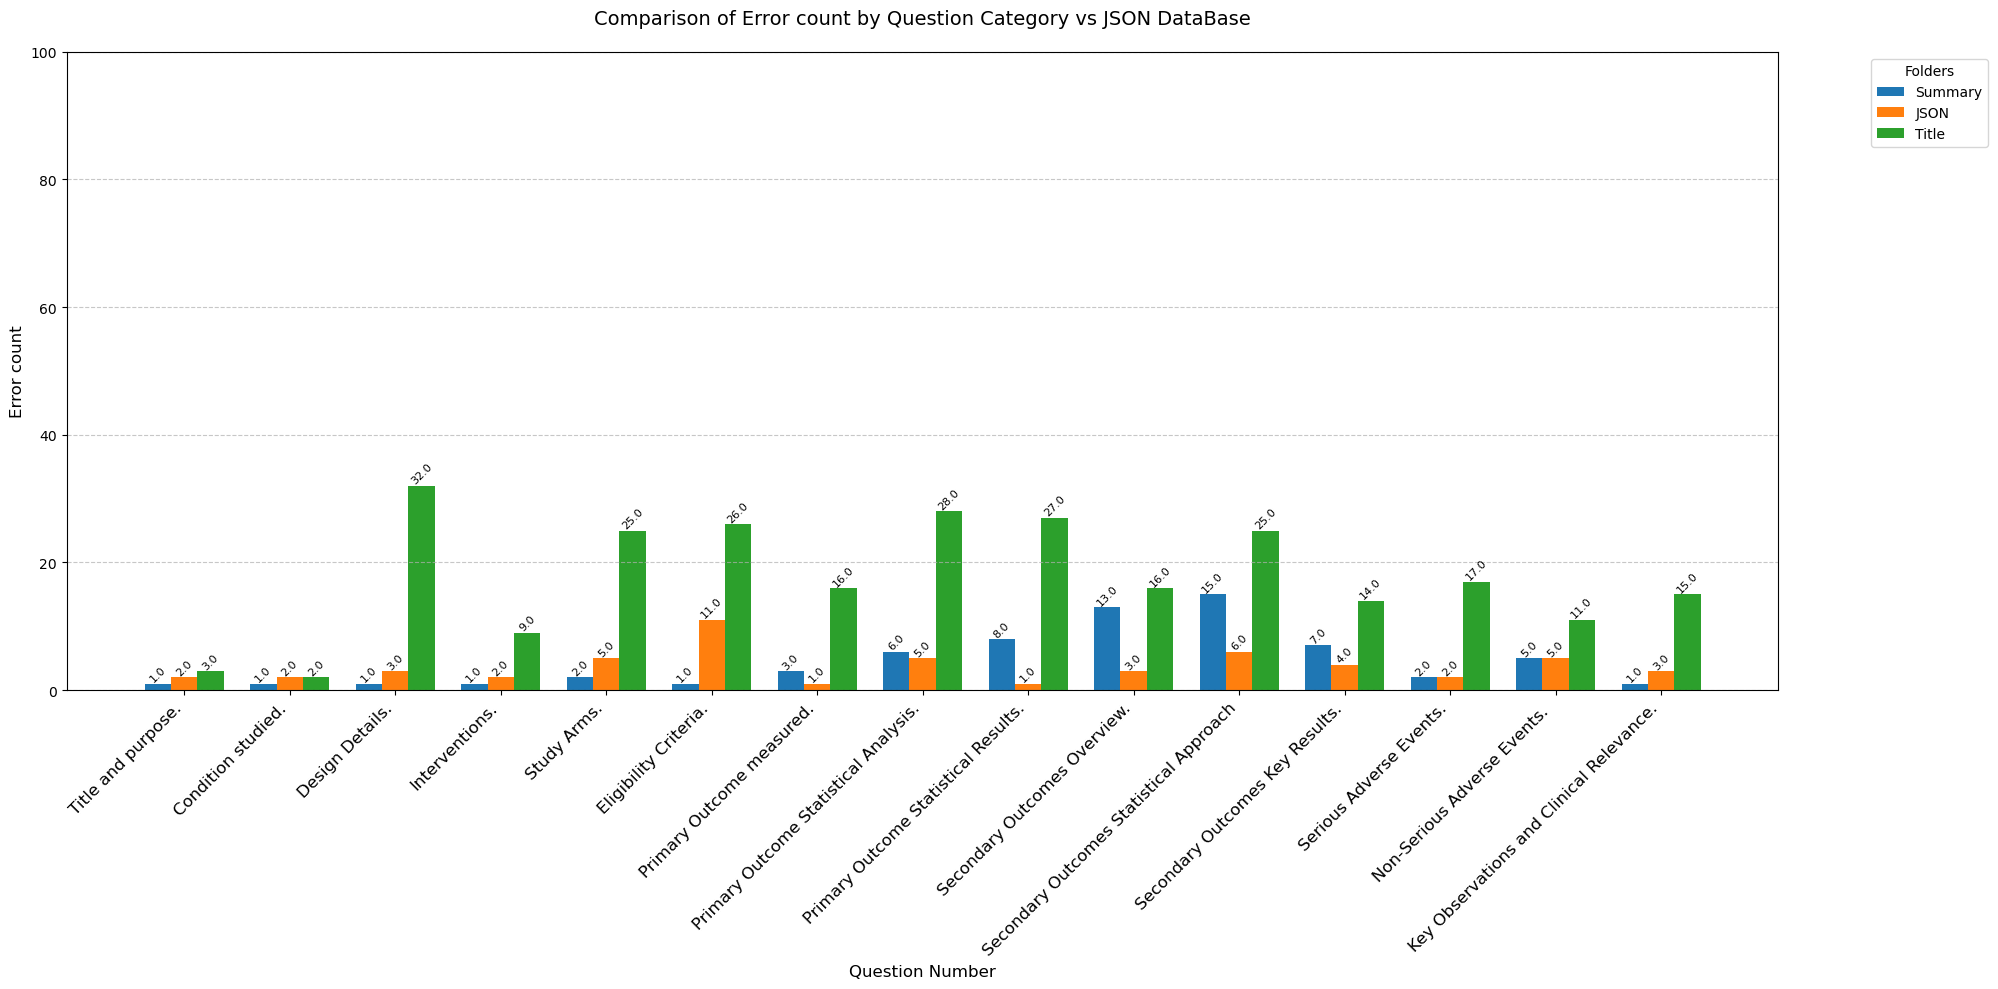

Plot saved as score_comparison_Paragraph.png


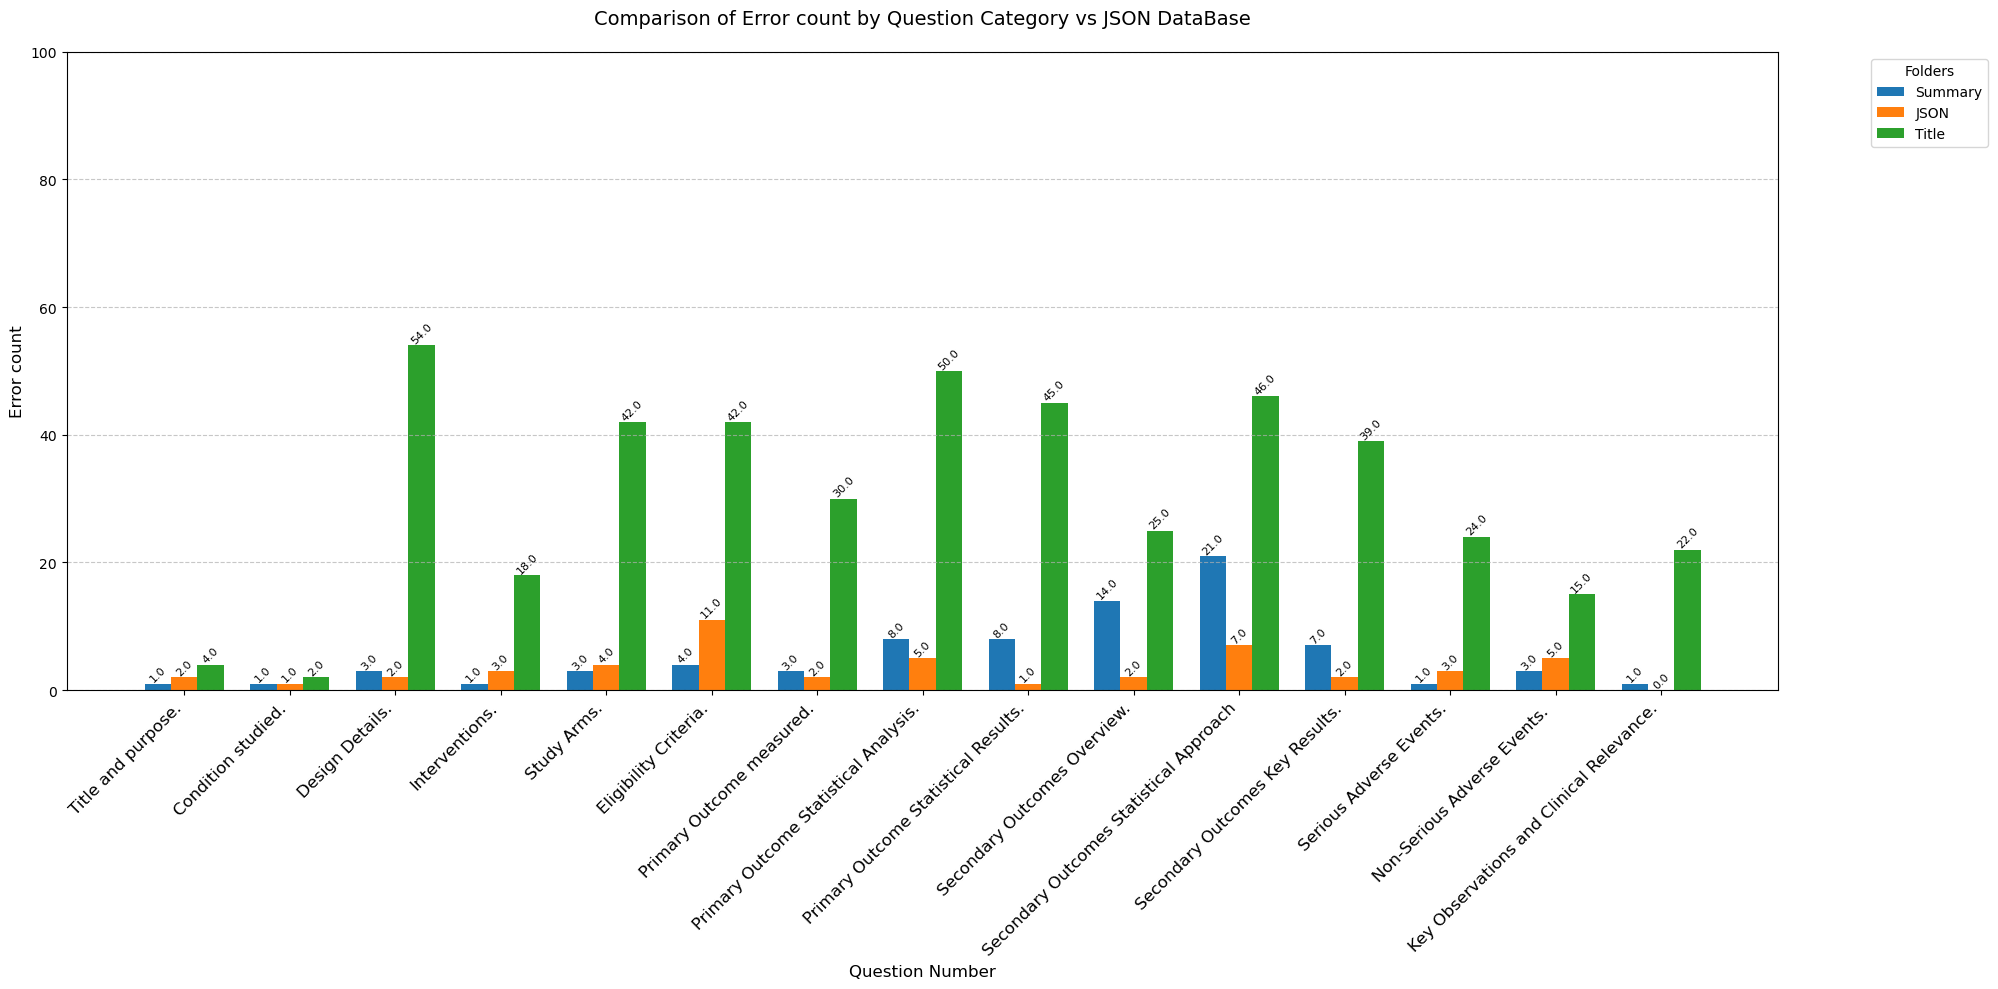

Plot saved as Error_direct_score_comparison_Paragraph.png


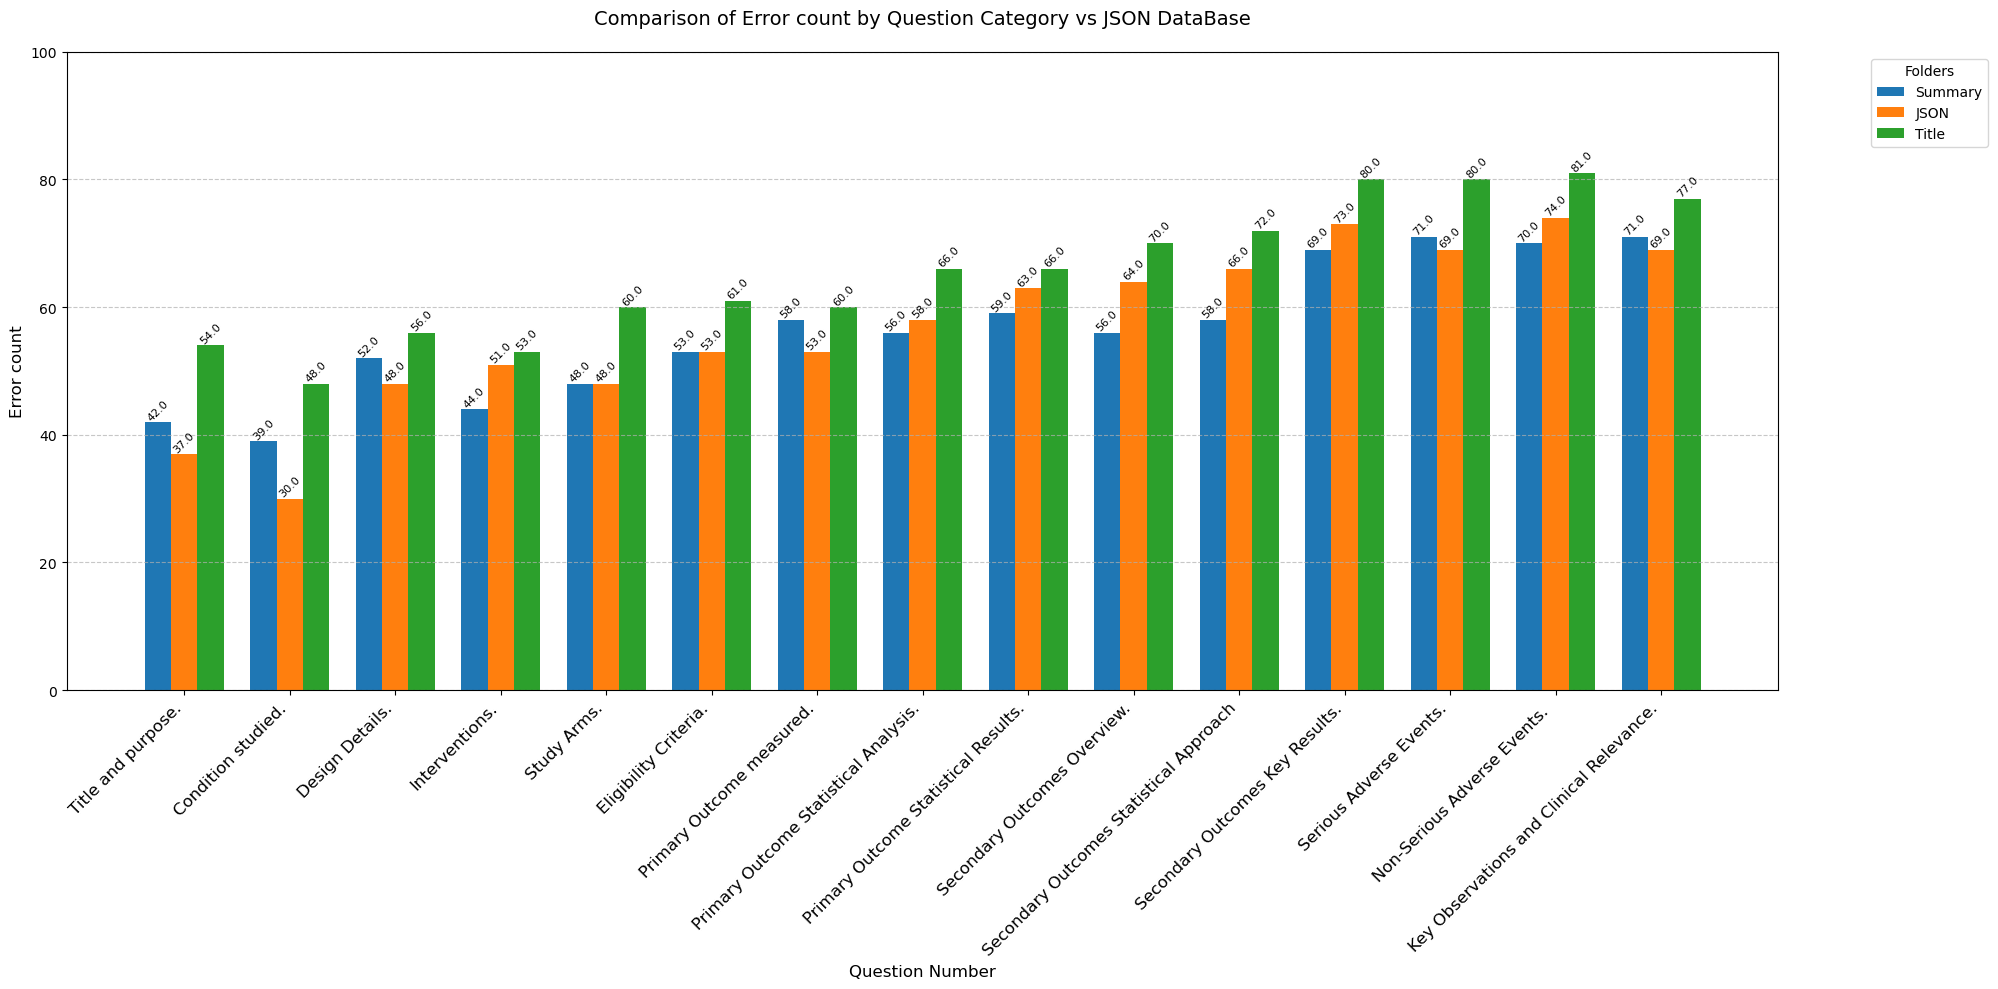

Plot saved as Error_score_comparison_Paragraph.png


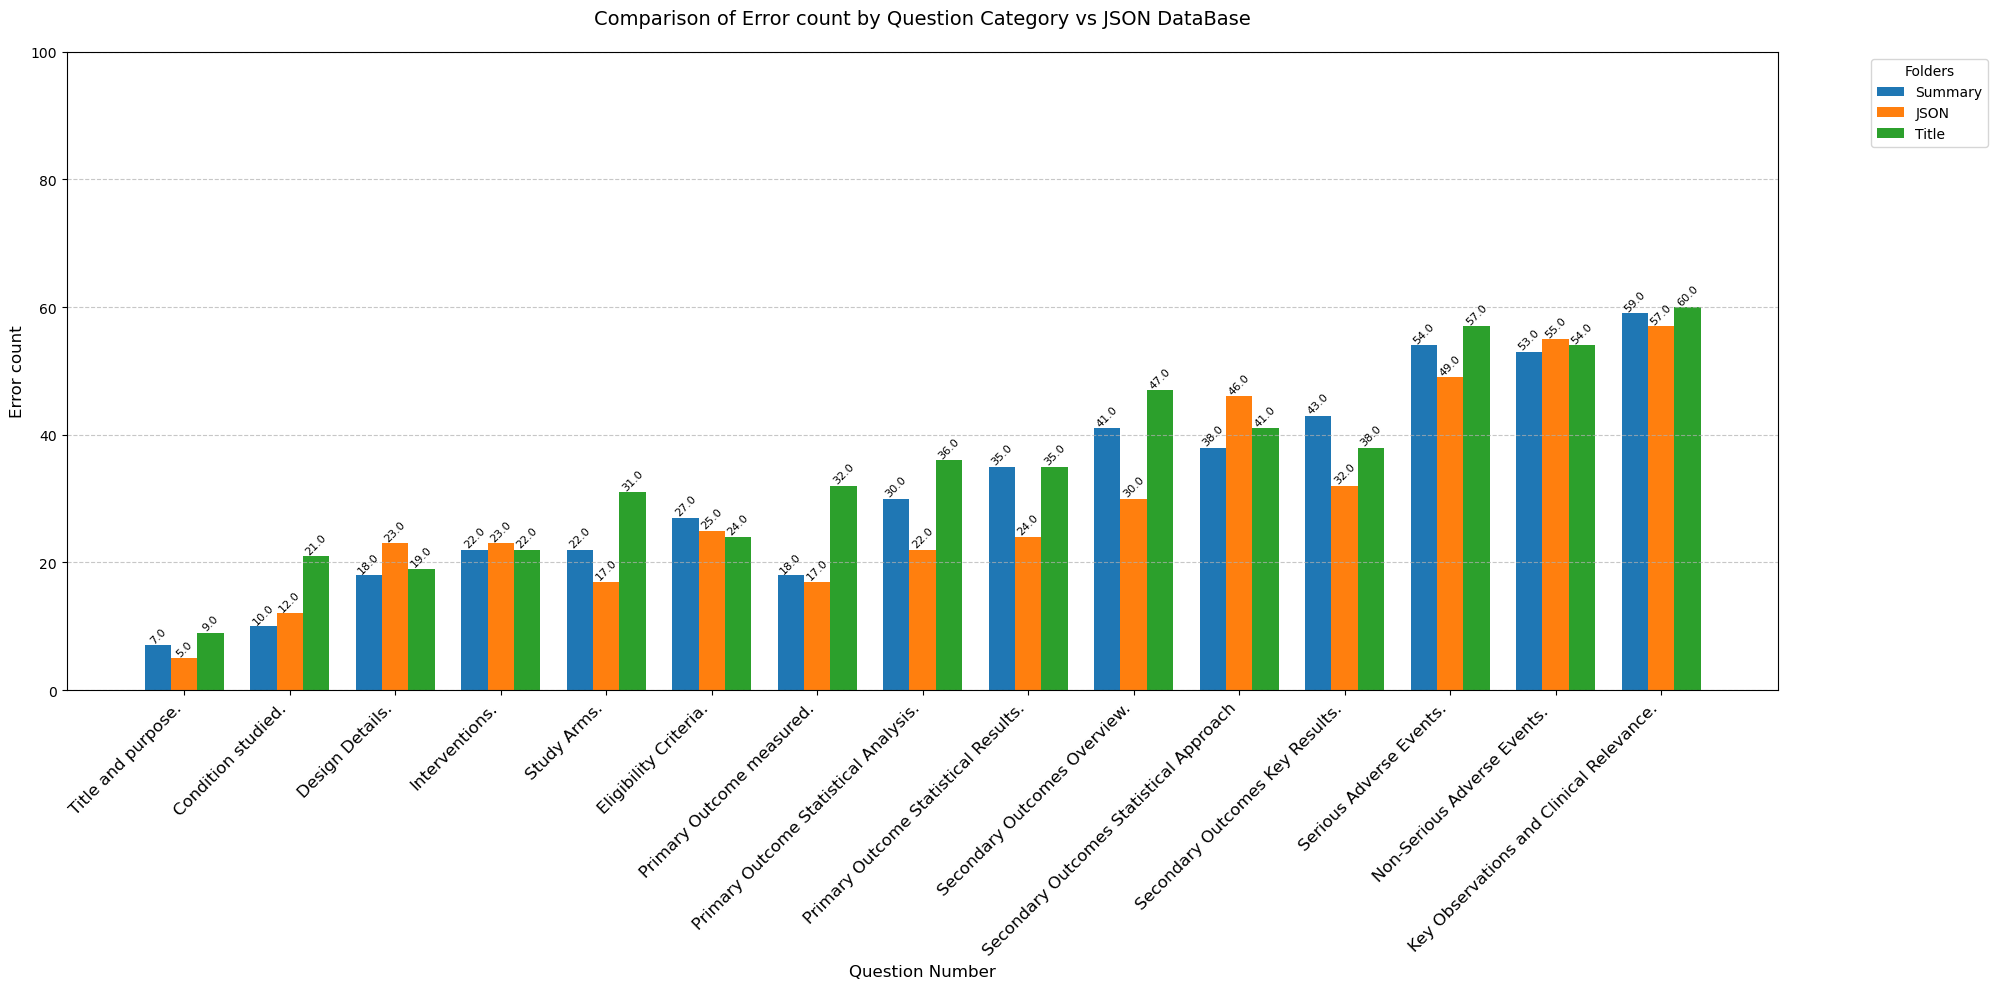

In [5]:
def plot_multiple_scores(all_scores: dict, total_files: dict, folder_names: list, name: str):
    """
    Create a bar plot comparing scores from multiple folders.
    
    Args:
        all_scores: Dictionary containing score sums for each folder
        total_files: Dictionary containing total files for each folder
        folder_names: List of folder names for legend
    """
    x_axes_names = {
        1: "Title and purpose.",
        2: "Condition studied.",
        3: "Design Details.",
        4: "Interventions.",
        5: "Study Arms.",
        6: "Eligibility Criteria.",
        7: "Primary Outcome measured.",
        8: "Primary Outcome Statistical Analysis.",
        9: "Primary Outcome Statistical Results.",
        10: "Secondary Outcomes Overview.",
        11: "Secondary Outcomes Statistical Approach",
        12: "Secondary Outcomes Key Results.",
        13: "Serious Adverse Events.",
        14: "Non-Serious Adverse Events. ",
        15: "Key Observations and Clinical Relevance."
    }
    
    # Prepare data for plotting
    questions = list(range(1, 16))
    width = 0.25  # Width of bars
    
    # Create figure and axis with larger size
    plt.figure(figsize=(20, 10))
    
    # Create bars for each folder
    positions = np.array(questions)
    for i, (folder, scores) in enumerate(all_scores.items()):
        offset = (i - 1) * width
        scores_list = [scores[f"Q{q}"] for q in questions]
        bars = plt.bar(positions + offset, scores_list, width, 
                      label=folder_names[i])
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=8, rotation=45)
    
    # Customize plot
    plt.title('Comparison of Error count by Question Category vs JSON DataBase', fontsize=14, pad=20)
    plt.xlabel('Question Number', fontsize=12)
    plt.ylabel('Error count', fontsize=12)
    
    # Set x-axis ticks with rotated labels
    plt.xticks(questions, 
               [x_axes_names[i] for i in questions],
               rotation=45,
               ha='right',
               fontsize=12)
    
    # Set y-axis limit from 0 to maximum total files
    plt.ylim(0, max(total_files.values()))
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add legend
    plt.legend(title="Folders", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save plot
    plt.savefig(name, dpi=300, bbox_inches='tight')
    print(f"Plot saved as {name}")
    
    # Show plot
    plt.show()

def main():
    """Main execution function."""
    try:
        # Specify your folder paths
        folders = {
            "folder1": "Evaluation_summary_Paragraph",  # Change these to your folder paths
            "folder2": "Evaluation_json_Paragraph",
            "folder3": "Evaluation_title_Paragraph"
        }
        
        # Friendly names for the legend
        folder_names = [
            "Summary",  # Change these to your preferred labels
            "JSON",
            "Title"
        ]
        
        # Analyze scores for each folder
        all_direct_scores = {}
        all_scores = {}
        all_direct_scores_half = {}
        all_scores_half = {}
        
        total_files = {}
        
        for folder_key, folder_path in folders.items():
            # direct_scores, scores, num_files = analyze_scores(folder_path)
            direct_scores, scores, num_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
            
            all_direct_scores[folder_key] = direct_scores
            all_scores[folder_key] = scores
            
            all_direct_scores_half[folder_key]= direct_half
            all_scores_half[folder_key]= score_half
            
            total_files[folder_key] = num_files
        
        # # Print results
        # print("\nScore sums for each question by folder:")
        # for folder_key, scores in all_scores.items():
        #     print(f"\n{folder_names[list(folders.keys()).index(folder_key)]}:")
        #     for q, sum_score in scores.items():
        #         print(f"{q}: {sum_score:.1f}")
        
        # Plot results
        # Plot results
        plot_multiple_scores(all_direct_scores, total_files, folder_names, "direct_score_comparison_Paragraph.png")
        plot_multiple_scores(all_scores, total_files, folder_names, "score_comparison_Paragraph.png")

        plot_multiple_scores(all_direct_scores_half, total_files, folder_names, "Error_direct_score_comparison_Paragraph.png")
        plot_multiple_scores(all_scores_half, total_files, folder_names, "Error_score_comparison_Paragraph.png")
        
    except Exception as e:
        print(f"Error in main: {e}")

if __name__ == "__main__":
    main()

## Overlay

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_three_folders_overlay(
    all_scores_db1: dict,
    all_scores_db2: dict,
    total_files_db1: dict,
    total_files_db2: dict,
    folder_names: list,
    output_name: str,
    db1_label: str = "Database A",
    db2_label: str = "Database B"
):
    """
    Plots 3 bars per question (one per folder in folder_names). 
    Each bar overlays two data values from two data sources:
      - db1 (fully opaque)
      - db2 (semi-transparent, alpha=0.5)
    in the same x-position.

    That means you get 3 positions on the x-axis (folder1, folder2, folder3),
    and at each position you see two bars on top of each other 
    (to compare db1 vs. db2 visually).
    
    Args:
        all_scores_db1: dict of folder_key -> { "Q1": val, ... } (Database A)
        all_scores_db2: same structure as db1 but from Database B
        total_files_db1: dict of folder_key -> total files (for y-axis)
        total_files_db2: same structure (Database B)
        folder_names: e.g. ["folder1", "folder2", "folder3"] in desired order
        output_name: filename to save the resulting plot
        db1_label: label used for the opaque bars in the legend
        db2_label: label used for the translucent bars in the legend
    """

    # Define question labels
    x_labels = {
        1:  "Title and purpose.",
        2:  "Condition studied.",
        3:  "Design Details.",
        4:  "Interventions.",
        5:  "Study Arms.",
        6:  "Eligibility Criteria.",
        7:  "Primary Outcome measured.",
        8:  "Primary Outcome Statistical Analysis.",
        9:  "Primary Outcome Statistical Results.",
        10: "Secondary Outcomes Overview.",
        11: "Secondary Outcomes Statistical Approach",
        12: "Secondary Outcomes Key Results.",
        13: "Serious Adverse Events.",
        14: "Non-Serious Adverse Events.",
        15: "Key Observations and Clinical Relevance."
    }

    questions = list(range(1, 16))
    x_positions = np.arange(len(questions))
    
    # We have 3 bars (one for each folder).
    # Let's space them out around each question x_position.
    num_folders = len(folder_names)
    width = 0.25
    # For 3 folders, possible offsets = -width, 0, +width (centered around each question)
    # A quick way:
    offsets = np.linspace(-width, width, num_folders)

    # We'll pick distinct colors for the 3 folders (matplotlib cycle, for instance)
    folder_colors = ["C0", "C1", "C2"]  # up to 3 folders

    plt.figure(figsize=(20, 10))

    # Loop over the 3 folders
    for i, folder_key in enumerate(folder_names):
        folder_color = folder_colors[i % len(folder_colors)]
        offset = offsets[i]

        # Extract the question-by-question values for each database
        folder_scores_db1 = all_scores_db1[folder_key]
        folder_scores_db2 = all_scores_db2[folder_key]

        values_db1 = [folder_scores_db1.get(f"Q{q}", 0) for q in questions]
        values_db2 = [folder_scores_db2.get(f"Q{q}", 0) for q in questions]

        # 1) Plot the DB1 bar (fully opaque)
        bars_db1 = plt.bar(
            x_positions + offset,
            values_db1,
            width=width,
            color=folder_color,
            alpha=1.0,  # fully opaque
            label=None  # We'll handle legend separately
        )
        # 2) Plot the DB2 bar at the same positions, but alpha=0.5
        bars_db2 = plt.bar(
            x_positions + offset,
            values_db2,
            width=width,
            color=folder_color,
            alpha=0.7,  # semi-transparent
            label=None
        )

        # Add numeric labels on top for each bar
        # We can pick one set of bars to label, or do both:
        # Let's label both so we see both values.
        for bar_db1, bar_db2 in zip(bars_db1, bars_db2):
            h1 = bar_db1.get_height()
            x1 = bar_db1.get_x() + bar_db1.get_width()/2.
            plt.text(x1, h1, f"{h1:.1f}", ha="center", va="bottom", fontsize=8, rotation=45)

            h2 = bar_db2.get_height()
            x2 = bar_db2.get_x() + bar_db2.get_width()/2.
            # Slight vertical shift if you want them not to overlap
            plt.text(x2, h2, f"{h2:.1f}", ha="center", va="bottom", fontsize=8, rotation=45)

    # Title and labels
    plt.title("Three Folders Overlaid with Two Databases (Opaque vs. Transparent)", fontsize=14, pad=20)
    plt.xlabel("Question Number", fontsize=12)
    plt.ylabel("Error Count", fontsize=12)

    # X-axis ticks
    plt.xticks(
        x_positions,
        [x_labels[q] for q in questions],
        rotation=45,
        ha="right",
        fontsize=10
    )

    # Determine y-limit from both data sets, across all folders
    max_db1 = max(total_files_db1.values()) if total_files_db1 else 0
    max_db2 = max(total_files_db2.values()) if total_files_db2 else 0
    y_max = max(max_db1, max_db2, 10)
    plt.ylim(0, y_max)

    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Legend: We'll add 3 handles for the folders (the color),
    # plus 2 handles for the "db1" vs "db2" alpha difference.
    # A neat approach is to create custom patches:
    from matplotlib.patches import Patch

    legend_patches = []
    # One patch per folder color
    for i, folder_key in enumerate(folder_names):
        folder_color = folder_colors[i % len(folder_colors)]
        legend_patches.append(
            Patch(facecolor=folder_color, alpha=1.0, label=f"{folder_key} ({db1_label} & {db2_label})")
        )
    # We also want a label for the alpha meaning
    # But if we add them as separate patches, it might be too busy. 
    # Instead, let's keep it simple: mention in the title or add two patches for alpha difference:
    alpha_patches = [
        Patch(facecolor="gray", alpha=1.0, label=db1_label),
        Patch(facecolor="gray", alpha=0.5, label=db2_label)
    ]

    plt.legend(handles=legend_patches + alpha_patches, bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10)

    plt.tight_layout()
    plt.savefig(output_name, dpi=300, bbox_inches="tight")
    print(f"Plot saved as {output_name}")
    plt.show()


Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1797.04it/s]


Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1298.48it/s]


Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1077.89it/s]


Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1410.68it/s]


Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1211.65it/s]


Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1025.64it/s]


Plot saved as superposed_overlay.png


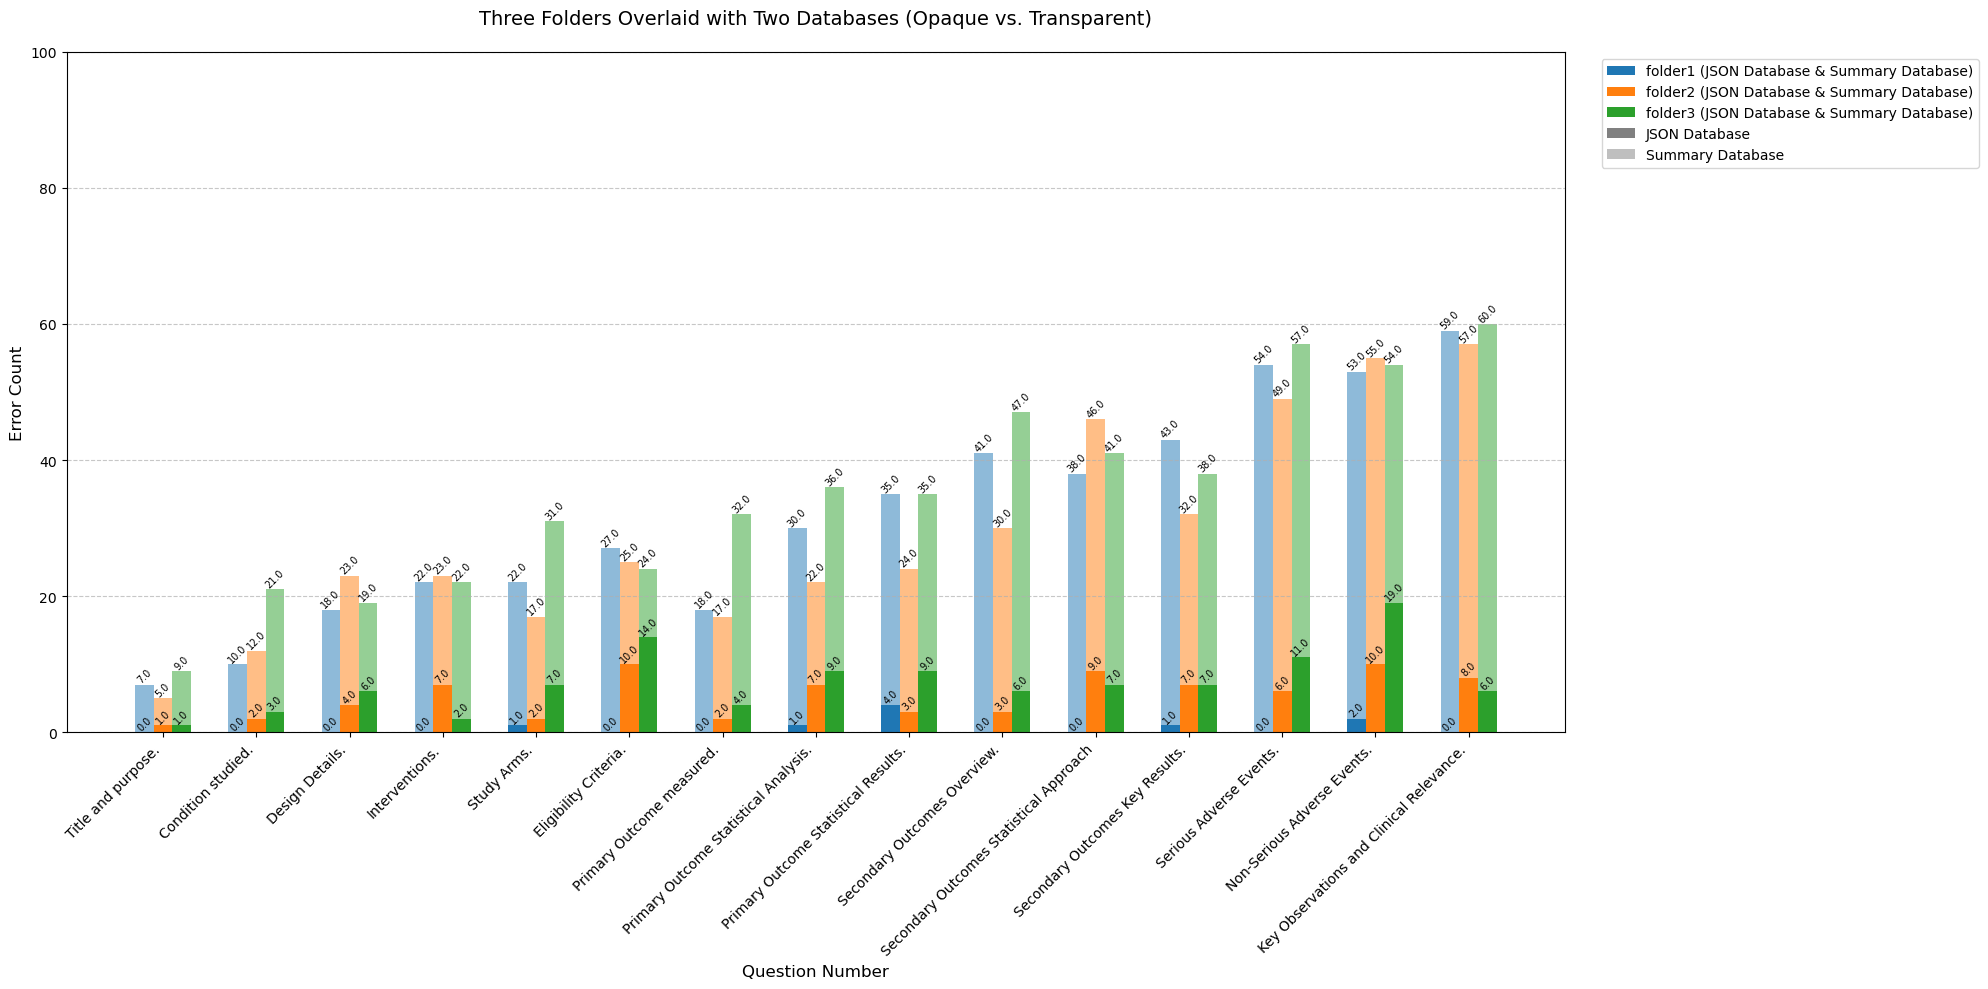

In [10]:
folders_db1 = {
    "folder1": "Eval_vs_Summary/Paragraph_level/Evaluation_summary_Paragraph",
    "folder2": "Eval_vs_Summary/Paragraph_level/Evaluation_json_Paragraph",
    "folder3": "Eval_vs_Summary/Paragraph_level/Evaluation_title_Paragraph"
}

folders_db2 = {
    "folder1": "Eval_vs_JSON/Paragraph_level/Evaluation_summary_Paragraph",
    "folder2": "Eval_vs_JSON/Paragraph_level/Evaluation_json_Paragraph",
    "folder3": "Eval_vs_JSON/Paragraph_level/Evaluation_title_Paragraph"
}

# Extract scores from each folder for DB1
all_scores_db1 = {}
total_files_db1 = {}
for k, path in folders_db1.items():
    _, _, num_files, _, scores, _, _ = analyze_scores(path)
    all_scores_db1[k] = scores
    total_files_db1[k] = num_files

# Extract scores from each folder for DB2
all_scores_db2 = {}
total_files_db2 = {}
for k, path in folders_db2.items():
    _, _, num_files, _, scores, _, _ = analyze_scores(path)
    all_scores_db2[k] = scores
    total_files_db2[k] = num_files

folder_order = ["folder1", "folder2", "folder3"]

plot_three_folders_overlay(
    all_scores_db1=all_scores_db1,
    all_scores_db2=all_scores_db2,
    total_files_db1=total_files_db1,
    total_files_db2=total_files_db2,
    folder_names=folder_order,
    output_name="superposed_overlay.png",
    db1_label="JSON Database",
    db2_label="Summary Database"
)
